In [1]:
# need alluvian plot
# !wget https://raw.githubusercontent.com/vinsburg/alluvial_diagram/master/alluvial.py

--2025-02-18 11:19:43--  https://raw.githubusercontent.com/vinsburg/alluvial_diagram/master/alluvial.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12728 (12K) [text/plain]
Saving to: ‘alluvial.py’

alluvial.py         100%[===================>]  12.43K  --.-KB/s    in 0s      

2025-02-18 11:19:43 (39.4 MB/s) - ‘alluvial.py’ saved [12728/12728]



In [138]:
import numpy as np 
import pandas as pd 
import upsetplot

from scipy.stats import pearsonr
import scipy.stats as stats


import matplotlib.pyplot as plt
import alluvial

In [136]:
# define functions

def get_fdrs(pvals_no_cis,pvals_no_trans,title='',visualize = True):
    ''' Correct raw p-values by Benjamini-Hochberg. Plot raw and corrected significance values if visualize is true.'''

    num_test = len(pvals_no_cis)

    sorted_index_cis = np.argsort(np.argsort(pvals_no_cis))
    sorted_index_trans = np.argsort(np.argsort(pvals_no_trans))
    fdr_no_cis = (np.arange(1,num_test+1)/num_test * sorted(pvals_no_cis))[sorted_index_cis]
    fdr_no_trans = (np.arange(1,num_test+1)/num_test * sorted(pvals_no_trans))[sorted_index_trans]

    if visualize:
        fs = 20
        fig,ax = plt.subplots(1,2,figsize=(10,5))

        ax[0].hist(pvals_no_trans,density=False,bins = 45)
        ax[0].set_title(title+'\nNull = NO $trans$',fontsize=fs)
        ax[0].set_xlabel('Uncorrected p-values',fontsize=fs)
        ax[0].set_ylabel('Number of genes',fontsize=fs)
        ax[0].grid()

        ax[1].hist(pvals_no_cis,bins = 45,density=False)
        ax[1].set_title(title+'\nNull = NO $cis$',fontsize=fs)
        ax[1].set_xlabel('Uncorrected p-values',fontsize=fs)
        ax[1].set_ylabel('Number of genes',fontsize=fs)
        ax[1].grid()

        plt.tight_layout()
        plt.show();

        fig,ax = plt.subplots(1,2,figsize=(10,5))

        ax[0].hist(fdr_no_trans,density=False,bins = 45,color='darkred')
        ax[0].set_title('Model C\nNull = NO $trans$',fontsize=fs)
        ax[0].set_xlabel('False discovery rates (FDRs)',fontsize=fs)
        ax[0].set_ylabel('Number of genes',fontsize=fs)
        ax[0].grid()

        ax[1].hist(fdr_no_cis,bins = 45,density=False,color='darkred')
        ax[1].set_title('Model_C\nNull = NO $cis$',fontsize=fs)
        ax[1].set_xlabel('False discovery rates (FDRs)',fontsize=fs)
        ax[1].set_ylabel('Number of genes',fontsize=fs)
        ax[1].grid()

        plt.tight_layout()
        plt.show();
    
    return(fdr_no_cis,fdr_no_trans)

def plot_weight_distributions(coefficients_C,
                              title='',
                              color = 'salmon',
                              bins=100):
    
    fs = 15
    s = 10
    beta_C = coefficients_C['V1'].values
    beta_c2_C = coefficients_C['V2'].values
    beta_t1_C = coefficients_C['V3'].values
    beta_t2_C = coefficients_C['V4'].values

    fig, ax = plt.subplots(1, 4, figsize=(14, 3))


    # Plot histograms with color and grid
    ax[0].hist(beta_C, bins=bins, color=color, alpha=0.7)
    ax[1].hist(beta_c2_C, bins=bins, color=color, alpha=0.7)
    ax[2].hist(beta_t1_C, bins=bins, color=color, alpha=0.7)
    ax[3].hist(beta_t2_C, bins=bins, color=color, alpha=0.7)

    # Set titles with enhanced font
    titles = ['$\\beta$', '$\\beta_{C2}$', '$\\beta_{T1}$', '$\\beta_{T2}$']
    for i, title_ in enumerate(titles):
        ax[i].set_title(title_, fontsize=fs, fontweight='bold', color='black')
        ax[i].grid(True, linestyle='--', alpha=0.5)
        ax[i].minorticks_on()
        ax[i].tick_params(axis='both', which='major', labelsize=fs-3)

    # Set x-limits and improve layout
    # ax[2].set_xlim(-2, 2)
    # ax[3].set_xlim(-2, 2)
    plt.tight_layout(pad=2)
    plt.suptitle(title,fontsize=fs+2, fontweight='bold', color='black')

    # Show plot
    plt.show();

    # and plot them against each other
    fig, ax = plt.subplots(2, 3, figsize=(10, 6), constrained_layout=True)

    ax[0, 0].scatter(beta_C, beta_c2_C, s=s, color=color, alpha=0.7, edgecolor='black')
    ax[0, 1].scatter(beta_C, beta_t1_C, s=s, color=color, alpha=0.7, edgecolor='black')
    ax[0, 2].scatter(beta_C, beta_t2_C, s=s, color=color, alpha=0.7, edgecolor='black')
    ax[1, 0].scatter(beta_c2_C, beta_t1_C, s=s, color=color, alpha=0.7, edgecolor='black')
    ax[1, 1].scatter(beta_c2_C, beta_t2_C, s=s, color=color, alpha=0.7, edgecolor='black')
    ax[1, 2].scatter(beta_t1_C, beta_t2_C, s=s, color=color, alpha=0.7, edgecolor='black')

    # Set axis labels with font size
    ax[0, 0].set_xlabel('$\\beta_{C}$', fontsize=fs)
    ax[0, 0].set_ylabel('$\\beta_{C2}$', fontsize=fs)
    ax[0, 1].set_xlabel('$\\beta_{C}$', fontsize=fs)
    ax[0, 1].set_ylabel('$\\beta_{T1}$', fontsize=fs)
    ax[0, 2].set_xlabel('$\\beta_{C}$', fontsize=fs)
    ax[0, 2].set_ylabel('$\\beta_{T2}$', fontsize=fs)
    ax[1, 0].set_xlabel('$\\beta_{C2}$', fontsize=fs)
    ax[1, 0].set_ylabel('$\\beta_{T1}$', fontsize=fs)
    ax[1, 1].set_xlabel('$\\beta_{C2}$', fontsize=fs)
    ax[1, 1].set_ylabel('$\\beta_{T2}$', fontsize=fs)
    ax[1, 2].set_xlabel('$\\beta_{T1}$', fontsize=fs)
    ax[1, 2].set_ylabel('$\\beta_{T2}$', fontsize=fs)

    # Add gridlines, central lines, and minor ticks
    for i in range(2):
        for j in range(3):
            ax[i, j].axvline(0, color='black', linestyle='--', linewidth=0.8)
            ax[i, j].axhline(0, color='black', linestyle='--', linewidth=0.8)
            ax[i, j].grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
            ax[i, j].minorticks_on()
            ax[i, j].tick_params(axis='both', which='major', labelsize=fs-3)

    # # Set a consistent x and y axis limit across subplots if appropriate
    # for axis in ax.flat:
    #     axis.set_xlim(-4, 4)
    #     axis.set_ylim(-4, 4)

    # Add a main title
    plt.suptitle(title, fontsize=fs+2, fontweight='bold')

    plt.show();


def get_r2(fitted_values,actual_values,title='',color='salmon',
           bins=100,visualize=True):
    
    fs = 20
    r2_C = np.zeros(len(actual_values))

    for i in range(len(r2_C)):
        fitted_values_i= fitted_values.iloc[i,:].values
        actual_values_i = actual_values.iloc[i,:].values    
        r2_C[i],_ = pearsonr(actual_values_i,fitted_values_i)

    if visualize:
        plt.hist(r2_C,bins=bins,color=color)
        plt.title(title, fontsize=fs, fontweight='bold', color='black')
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.xlabel('Pearson $R^2$ values',fontsize=fs)
        plt.ylabel('Number of genes',fontsize=fs)

    return(r2_C)


def make_triplot(coefficients,
                 fdr_no_cis,
                 fdr_no_trans,
                 genes,
                 title):

    # use models to calculate values for parental and hybrid alleles
    cell_size = 10000
    X_standard = np.array([[1,0,1,0],
                           [1,1,0,1],
                           [1,0,1,1],
                           [1,1,1,1]])
    
    num_test = len(coefficients)

    pred_counts = np.array(  [np.sum(coefficients.iloc[i,:].values*X_standard,axis=1) + np.log(cell_size) for i in range(num_test)]  )
    pred_counts = np.exp(pred_counts)


    # create data frame for genes

    df_model = pd.DataFrame({
        'gene' : genes,
        'P1' : pred_counts[:,0],
        'P2' : pred_counts[:,1],
        'H1' : pred_counts[:,2],
        'H2' : pred_counts[:,3],
        'Parlog2FC' : np.log2(pred_counts[:,0]/pred_counts[:,1]),
        'Hyblog2FC' : np.log2(pred_counts[:,2]/pred_counts[:,3]),
    })
    
    df_model = df_model.set_index('gene')

    colors_2 = np.array(['lightgray']*num_test)

    P = df_model['Parlog2FC'].values.flatten()
    H = df_model['Hyblog2FC'].values.flatten()
    delta = P - H

    cis_index = (fdr_no_cis<0.05)&(fdr_no_trans>0.05)
    trans_index = (fdr_no_cis>0.05)&(fdr_no_trans<0.05)
    amb_index = (fdr_no_cis>0.05)&(fdr_no_trans>0.05)

    cis_plus_trans_index = (fdr_no_cis<0.05)&(fdr_no_trans<0.05)& (((delta > 0) & (H > 0)) | ( (delta < 0) & (H < 0)))
    cis_x_trans_index = (fdr_no_cis<0.05)&(fdr_no_trans<0.05)&(((delta <= 0) & (H >= 0)) | ( (delta >= 0) & (H <= 0))) 

    colors_2[cis_index] = 'orangered'
    colors_2[trans_index] = 'royalblue'                                                                   
    colors_2[cis_plus_trans_index] = 'skyblue'                                                                   
    colors_2[cis_x_trans_index] = 'green'                                                                                                                                              
    df_model['colors'] = colors_2                                                                                        
                                                                                    
    reg_assignments = np.array(['conserved']*num_test)
    reg_assignments[cis_index] = 'cis'
    reg_assignments[trans_index] = 'trans'                                                                   
    reg_assignments[cis_plus_trans_index] = 'cis+trans'                                                                   
    reg_assignments[cis_x_trans_index] = 'cisxtrans'   
    df_model['reg_assignment'] = reg_assignments                                                                               



    # random order
    df = df_model
    fig, ax = plt.subplots(3, 1, figsize=(6, 23*(3/4)))

    s = 2
    alpha = 1.0
    axis_fs = 25
    title_fs = 18
    label_fs = 20
    line_color = 'black'
    axis_width = 3.0
    line_alpha = 0.7
    fs = 20

    P = df['Parlog2FC'].values.flatten()
    H = df['Hyblog2FC'].values.flatten()
    delta = P - H
    theta_scaled = (2/np.pi) * np.arctan(H / delta)
    R = np.sqrt(delta**2 + H**2)

    df_model['R'] = R
    df_model['theta_scaled'] = theta_scaled


    cis_prop_reordered = theta_scaled-0.5
    cis_prop_reordered[cis_prop_reordered<=-1.0] = (cis_prop_reordered[cis_prop_reordered<=-1.0]) + 2.0
    df_model['cis_prop_reordered'] = cis_prop_reordered
    colors = df['colors'].values

    num_per_reg_group_B = [sum(colors=='green'),
                        sum(colors=='skyblue'),
                        sum(colors=='royalblue'),
                        sum(colors=='orangered'),
                        sum(colors_2=='lightgray')] 

    random_idx = np.arange(0,len(colors))
    np.random.shuffle(random_idx)


    ax[0].scatter(P[random_idx],H[random_idx],s = s, alpha = alpha, c = colors[random_idx])
    ax[0].set_xlabel('$R_{P}$ (log2 parental fold change)', fontsize = axis_fs)
    ax[0].set_ylabel('$R_{H}$ (log2 hybrid fold change)', fontsize = axis_fs)

    ax[1].scatter(P[random_idx]-H[random_idx],H[random_idx],s=s,alpha=alpha,  c = colors[random_idx])
    ax[1].set_xlabel('$R_{P} - R_{H}$',fontsize = axis_fs)
    ax[1].set_ylabel('$R_{H}$',fontsize = axis_fs)

    ax[2].scatter(cis_prop_reordered[random_idx], P[random_idx] ,s = s, alpha = alpha, c =colors[random_idx])
    # ax[2].set_xlabel(r'$\frac{2}{\pi} \theta$ (scaled angle from $trans$ axis)',fontsize=axis_fs)
    ax[2].set_ylabel('$R_{P}$',fontsize=axis_fs)

    for i in range(2):
        ax[i].set_xlabel(ax[i].get_xlabel(), fontsize=axis_fs)
        ax[i].set_ylabel(ax[i].get_ylabel(), fontsize=axis_fs)
        ax[i].tick_params(axis='both', labelsize=label_fs)
        ax[i].grid(which='both', alpha=0.5, linewidth=0.5)
        ax[i].minorticks_on()


    # Determine the diagonal points for the line y = x
    x_min, x_max = ax[i].get_xlim()
    y_min, y_max = ax[i].get_ylim()
    diag_val = max( np.abs(x_min), np.abs(x_max), np.abs(y_min), np.abs(y_max) )
    # ax[i].plot([-diag_val, diag_val], np.sqrt(3)*np.array([-diag_val, diag_val]), color='black',alpha=0.7,linestyle='--')
    # ax[i].plot([-diag_val, diag_val], np.sqrt(3)*np.array([diag_val, -diag_val]), color='black',alpha=0.7,linestyle='--')
    # ax[i].plot([-diag_val, diag_val], (1/np.sqrt(3))*np.array([-diag_val, diag_val]), color='black',alpha=0.7,linestyle='--')
    # ax[i].plot([-diag_val, diag_val], (1/np.sqrt(3))*np.array([diag_val, -diag_val]), color='black',alpha=0.7,linestyle='--')


    x = np.linspace(-diag_val, diag_val, 100) 
    ax_ = ax[0]
    ax_.plot(x, x, color='orangered', linewidth=axis_width,alpha = line_alpha,zorder=0)
    ax_.axhline(0, color='darkblue', linewidth=axis_width, alpha=line_alpha,zorder=0)
    ax_.plot(x+x, x, color='skyblue', linewidth=axis_width,alpha = line_alpha,zorder=0)
    ax_.plot(-x-x, x, color='forestgreen', linewidth=axis_width,alpha = line_alpha,zorder=0)
    # ax_.axhline(0, color='black', linewidth=2, alpha=0.7, linestyle='-')
    ax_.axvline(0, color='black', linewidth=2, alpha=0.7, linestyle='-',zorder=0)
    ax_.set_xlim(-diag_val, diag_val)
    ax_.set_ylim(-diag_val, diag_val)

    ax_ = ax[1]
    ax_.axvline(0, color='orangered', linewidth=axis_width, alpha=line_alpha,zorder=0)
    ax_.axhline(0, color='darkblue', linewidth=axis_width, alpha = line_alpha,zorder=0)
    ax_.plot(x, x, color='skyblue', linewidth=axis_width,alpha = line_alpha,zorder=0)
    ax_.plot(-x, x, color='forestgreen', linewidth=axis_width,alpha = line_alpha,zorder=0)
    ax_.set_xlim(-diag_val, diag_val)
    ax_.set_ylim(-diag_val, diag_val)

    # Set additional grid lines for the third plot
    ax_ = ax[2]
    ax_.axvline(0.5, color='orangered', linewidth=axis_width, alpha=line_alpha,zorder=0)
    ax_.axvline(-0.5, color='darkblue', linewidth=axis_width, alpha=line_alpha,zorder=0)
    ax_.axvline(0.0, color='skyblue', linewidth=axis_width, alpha=line_alpha,zorder=0)
    ax_.axvline(-1, color='forestgreen', linewidth=axis_width, alpha=line_alpha,zorder=0)
    ax_.axvline(1, color='forestgreen', linewidth=axis_width, alpha=line_alpha,zorder=0)
    ax_.axhline(0, color='gray', linewidth=axis_width, alpha = line_alpha,zorder=0)
    ax_.axhline(0, color='black', linewidth=2, alpha=0.7, linestyle='-')

    ax[2].tick_params(axis='both', labelsize=label_fs)
    ax[2].tick_params(bottom=False)
    ax[2].grid(which='both', alpha=0.5, linewidth=0.5)
    ax[2].minorticks_on()



    plt.tight_layout()
    plt.subplots_adjust(hspace=0.2)
    ax[0].set_title(title,fontsize=fs,fontweight='bold')
    plt.show();


    return(df_model)


def make_triplot_horizontal(coefficients, fdr_no_cis, fdr_no_trans, genes, title):
    # use models to calculate values for parental and hybrid alleles
    cell_size = 10000
    X_standard = np.array([[1,0,1], 
                           [1,1,0], 
                           [1,0,.5], 
                           [1,1,.5]])
    
    num_test = len(coefficients)

    pred_counts = np.array([np.sum(coefficients.iloc[i,:].values*X_standard, axis=1) + np.log(cell_size) for i in range(num_test)])
    pred_counts = np.exp(pred_counts)

    df_model = pd.DataFrame({
        'gene': genes,
        'P1': pred_counts[:,0],
        'P2': pred_counts[:,1],
        'H1': pred_counts[:,2],
        'H2': pred_counts[:,3],
        'Parlog2FC': np.log2(pred_counts[:,0] / pred_counts[:,1]),
        'Hyblog2FC': np.log2(pred_counts[:,2] / pred_counts[:,3]),
    })
    df_model = df_model.set_index('gene')

    colors_2 = np.array(['lightgray'] * num_test)

    P = df_model['Parlog2FC'].values.flatten()
    H = df_model['Hyblog2FC'].values.flatten()
    delta = P - H

    cis_index = (fdr_no_cis < 0.05) & (fdr_no_trans > 0.05)
    trans_index = (fdr_no_cis > 0.05) & (fdr_no_trans < 0.05)
    amb_index = (fdr_no_cis > 0.05) & (fdr_no_trans > 0.05)
    cis_plus_trans_index = (fdr_no_cis < 0.05) & (fdr_no_trans < 0.05) & (((delta > 0) & (H > 0)) | ((delta < 0) & (H < 0)))
    cis_x_trans_index = (fdr_no_cis < 0.05) & (fdr_no_trans < 0.05) & (((delta <= 0) & (H >= 0)) | ((delta >= 0) & (H <= 0)))

    colors_2[cis_index] = 'orangered'
    colors_2[trans_index] = 'royalblue'
    colors_2[cis_plus_trans_index] = 'skyblue'
    colors_2[cis_x_trans_index] = 'green'
    df_model['colors'] = colors_2

    reg_assignments = np.array(['conserved'] * num_test)
    reg_assignments[cis_index] = 'cis'
    reg_assignments[trans_index] = 'trans'
    reg_assignments[cis_plus_trans_index] = 'cis+trans'
    reg_assignments[cis_x_trans_index] = 'cisxtrans'
    df_model['reg_assignment'] = reg_assignments

    df = df_model
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))  # Horizontal layout (1 row, 3 columns)

    s = 2
    alpha = 1.0
    axis_fs = 25
    label_fs = 20
    line_color = 'black'
    axis_width = 3.0
    line_alpha = 0.7
    fs = 20

    P = df['Parlog2FC'].values.flatten()
    H = df['Hyblog2FC'].values.flatten()
    delta = P - H
    theta_scaled = (2 / np.pi) * np.arctan(H / delta)
    R = np.sqrt(delta ** 2 + H ** 2)

    df_model['R'] = R
    df_model['theta_scaled'] = theta_scaled

    cis_prop_reordered = theta_scaled - 0.5
    cis_prop_reordered[cis_prop_reordered <= -1.0] += 2.0
    df_model['cis_prop_reordered'] = cis_prop_reordered

    colors = df['colors'].values

    random_idx = np.arange(0, len(colors))
    np.random.shuffle(random_idx)

    ax[0].scatter(P[random_idx], H[random_idx], s=s, alpha=alpha, c=colors[random_idx])
    ax[0].set_xlabel('$R_{P}$ (log2 parental fold change)', fontsize=axis_fs)
    ax[0].set_ylabel('$R_{H}$ (log2 hybrid fold change)', fontsize=axis_fs)

    ax[1].scatter(P[random_idx] - H[random_idx], H[random_idx], s=s, alpha=alpha, c=colors[random_idx])
    ax[1].set_xlabel('$R_{P} - R_{H}$', fontsize=axis_fs)
    ax[1].set_ylabel('$R_{H}$', fontsize=axis_fs)

    ax[2].scatter(cis_prop_reordered[random_idx], P[random_idx], s=s, alpha=alpha, c=colors[random_idx])
    ax[2].set_ylabel('$R_{P}$', fontsize=axis_fs)

    for i in range(3):
        ax[i].tick_params(axis='both', labelsize=label_fs)
        ax[i].grid(which='both', alpha=0.5, linewidth=0.5)
        ax[i].minorticks_on()

    x_min, x_max = ax[i].get_xlim()
    y_min, y_max = ax[i].get_ylim()
    diag_val = max(np.abs(x_min), np.abs(x_max), np.abs(y_min), np.abs(y_max))

    x = np.linspace(-diag_val, diag_val, 100)
    ax[0].plot(x, x, color='orangered', linewidth=axis_width, alpha=line_alpha, zorder=0)
    ax[0].axhline(0, color='darkblue', linewidth=axis_width, alpha=line_alpha, zorder=0)
    ax[0].plot(x+x, x, color='skyblue', linewidth=axis_width,alpha = line_alpha,zorder=0)
    ax[0].axvline(0, color='black', linewidth=2, alpha=0.7, linestyle='-', zorder=0)
    ax[0].plot(-x-x, x, color='forestgreen', linewidth=axis_width,alpha = line_alpha,zorder=0)
    ax[0].set_xlim(-diag_val, diag_val)
    ax[0].set_ylim(-diag_val, diag_val)

    ax[1].axvline(0, color='orangered', linewidth=axis_width, alpha=line_alpha, zorder=0)
    ax[1].axhline(0, color='darkblue', linewidth=axis_width, alpha=line_alpha, zorder=0)
    ax[1].plot(x, x, color='skyblue', linewidth=axis_width,alpha = line_alpha,zorder=0)
    ax[1].plot(-x, x, color='forestgreen', linewidth=axis_width,alpha = line_alpha,zorder=0)
    ax[1].set_xlim(-diag_val, diag_val)
    ax[1].set_ylim(-diag_val, diag_val)

    ax[2].axvline(0.5, color='orangered', linewidth=axis_width, alpha=line_alpha, zorder=0)
    ax[2].axvline(-0.5, color='darkblue', linewidth=axis_width, alpha=line_alpha, zorder=0)
    ax[2].axvline(0.0, color='skyblue', linewidth=axis_width, alpha=line_alpha, zorder=0)
    ax[2].axvline(-1, color='forestgreen', linewidth=axis_width, alpha=line_alpha, zorder=0)
    ax[2].axvline(1, color='forestgreen', linewidth=axis_width, alpha=line_alpha, zorder=0)
    ax[2].axhline(0, color='black', linewidth=2, alpha=0.7, linestyle='-')

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.2)
    ax[0].set_title(title, fontsize=fs, fontweight='bold')
    plt.show()

    return df_model




def plot_reg_bar(reg_assignments,title):
    
    # number per category
    reg_groups = ['cis x trans','cis + trans','trans', 'cis', 'conserved']
    bar_colors = ['green','skyblue','royalblue','orangered','lightgray']
    
    num_per_reg_group = [ np.sum(reg_assignments=='cisxtrans'),
                          np.sum(reg_assignments=='cis+trans'),
                          np.sum(reg_assignments=='trans'),
                          np.sum(reg_assignments=='cis'),
                          np.sum(reg_assignments=='conserved') ]
    
    # barplot

    fig, ax = plt.subplots(1,1,figsize = (8,6) )

    axis_fs = 20
    title_fs = 20
    bars = ax.bar(range(len(num_per_reg_group)), num_per_reg_group, color=bar_colors)

    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}',
                ha='center', va='bottom', fontsize=25)

    ax.set_xticks(range(len(num_per_reg_group)))
    ax.set_xticklabels(reg_groups,fontsize=axis_fs-4,rotation=45,ha='right')
    ax.set_xlabel('Assigned regulation group',fontsize=axis_fs)
    ax.set_ylabel('Number of genes',fontsize= axis_fs)
    ax.set_yscale('log')
    ax.yaxis.grid(which='both', alpha=0.5, linewidth=0.5)
    ax.minorticks_on()
    ax.xaxis.set_tick_params(which='minor', bottom=False)
    ax.set_title(title,fontsize=title_fs)

    plt.show();




def plot_alluvian(df1,df2,title,column,reg_groups,alluvial_colors,
                  plot_log=False,s1=2,s2=8):

    num_overlap_dict = {r : {} for r in reg_groups}
    log_num_overlap_dict = {r : {} for r in reg_groups}

    for r1 in reg_groups:
        their_indices = df1[df1[column] == r1].index.values.flatten()
        for r2 in reg_groups:
            our_indices = df2[df2[column] == r2 ].index.values.flatten()
            num_overlap = len(set(their_indices).intersection(set(our_indices)))
            num_overlap_dict[r1][r2+' * '] = num_overlap
            if num_overlap!= 0:
                log_num_overlap_dict[r1][r2+' * '] = np.log(num_overlap)
            else:
                log_num_overlap_dict[r1][r2+' * '] = 0


    # alluvial_colors = ['skyblue','orangered','forestgreen','royalblue','lightgray']
    if plot_log:
        ax = alluvial.plot(log_num_overlap_dict,colors=alluvial_colors,alpha = 0.9)
    else:
        ax = alluvial.plot(num_overlap_dict,colors=alluvial_colors,alpha = 0.9)
    fig = ax.get_figure()
    fig.set_size_inches(s1,s2)
    plt.title(title,fontsize=20,fontweight='bold')
    plt.show();

def plot_alluvian2(df1, df2, title, column, reg_groups, alluvial_colors, plot_log=False, s1 = 2, s2 = 8):
    num_overlap_dict = {r: {} for r in reg_groups}
    log_num_overlap_dict = {r: {} for r in reg_groups}

    # Calculate overlap counts and log-transformed counts
    for r1 in reg_groups:
        their_indices = df1[df1[column] == r1].index.values.flatten()
        for r2 in reg_groups:
            our_indices = df2[df2[column] == r2].index.values.flatten()
            num_overlap = len(set(their_indices).intersection(set(our_indices)))
            num_overlap_dict[r1][r2 + ' * '] = num_overlap
            log_num_overlap_dict[r1][r2 + ' * '] = np.log(num_overlap) if num_overlap != 0 else 0

    # Calculate total counts for each category on both sides
    left_totals = {r1: sum(overlaps.values()) for r1, overlaps in num_overlap_dict.items()}
    right_totals = {r2 + ' * ': sum(num_overlap_dict[r1][r2 + ' * '] for r1 in reg_groups) for r2 in reg_groups}

    # Add totals to the labels in num_overlap_dict and log_num_overlap_dict
    for r1 in reg_groups:
        left_label = f"{r1} ({left_totals[r1]})"
        num_overlap_dict[left_label] = num_overlap_dict.pop(r1)
        log_num_overlap_dict[left_label] = log_num_overlap_dict.pop(r1)
    
    for r2 in reg_groups:
        right_label = f"{r2} * ({right_totals[r2 + ' * ']})"
        for label_dict in [num_overlap_dict, log_num_overlap_dict]:
            for left_key in label_dict.keys():
                label_dict[left_key][right_label] = label_dict[left_key].pop(r2 + ' * ')

    # Plotting
    if plot_log:
        ax = alluvial.plot(log_num_overlap_dict, colors=alluvial_colors, alpha=0.9)
    else:
        ax = alluvial.plot(num_overlap_dict, colors=alluvial_colors, alpha=0.9)

    fig = ax.get_figure()
    fig.set_size_inches(s1, s2)
    plt.title(title, fontsize=20, fontweight='bold')
    plt.show()


In [137]:
# gene names
data_path = '../data/'
gene_names_raw1 = pd.read_csv(data_path + "ballinger/gProfiler_gene_names_1.csv")
gene_names_raw = pd.read_csv(data_path + "gProfiler_gene_names.csv")
# concatenate
gene_names_df = pd.concat((gene_names_raw1,gene_names_raw)).sort_values(by='name',ascending=True)
gene_names = gene_names_df.name.values
gene_ids = gene_names_df.initial_alias.values

# Male, BAT, Cold results

In [47]:
results_path = '../results/BATcold_'
title_bat_cold = 'Male, BAT, Cold'

coefficients_bat_cold = pd.read_csv(f'{results_path}weights_log_additive.csv',header=0,index_col=0)
sig_df_ = pd.read_csv(f'{results_path}sig_log_additive.csv',header=0,index_col=0)


pvals_no_cis_bat_cold = sig_df_['raw_pval_beta_cis'].values
pvals_no_trans_bat_cold = sig_df_['raw_pval_beta_trans'].values


# fitted_values_bat_cold = pd.read_csv(f'{results_path}edgeR_fitted_vals.csv')
# actual_values_bat_cold = pd.read_csv('../data/ballinger/male_BAT_cold_X.txt',delimiter='\t',header=None).T

# # assigned categories 
assigned_bat_cold = pd.read_csv(data_path + 'BAT.MALE.COLD.categories.forplot.txt',sep=' ')
assigned_bat_cold = assigned_bat_cold.set_index( 'Unnamed: 0' )
genes_bat_cold = np.sort(assigned_bat_cold.index.values)
assigned_bat_cold = assigned_bat_cold.loc[ genes_bat_cold, :]




In [139]:
assigned_bat_cold

,log2FoldChange,padj,log2FoldChange.1,padj.1,batpvals_coldmale_adj,Amb&Conserved,Reg_to_compare
Unnamed: 0,,,,,,,
ENSMUSG00000000056,0.372084,2.329602e-03,0.210891,0.426381,0.754196,Amb&Conserved,Amb&Conserved
ENSMUSG00000000058,-0.080267,7.611244e-01,-0.152230,0.157514,0.874010,Amb&Conserved,Amb&Conserved
ENSMUSG00000000078,-0.705219,4.145194e-04,0.126497,0.747585,0.001745,TRANS_ONLY,TRANS_ONLY
ENSMUSG00000000088,-0.023723,9.486976e-01,0.068411,0.359025,0.591458,Amb&Conserved,Amb&Conserved
ENSMUSG00000000120,0.139461,6.850433e-01,0.238733,0.724706,1.000000,Amb&Conserved,Amb&Conserved
...,...,...,...,...,...,...,...
ENSMUSG00000116262,-0.643781,9.908695e-03,-0.684874,0.568454,1.000000,Amb&Conserved,Amb&Conserved
ENSMUSG00000116564,0.473846,7.669804e-05,-0.146609,0.842717,0.552255,Amb&Conserved,Amb&Conserved
ENSMUSG00000117406,0.943294,1.978466e-03,-0.054954,0.968824,0.774654,Amb&Conserved,Amb&Conserved


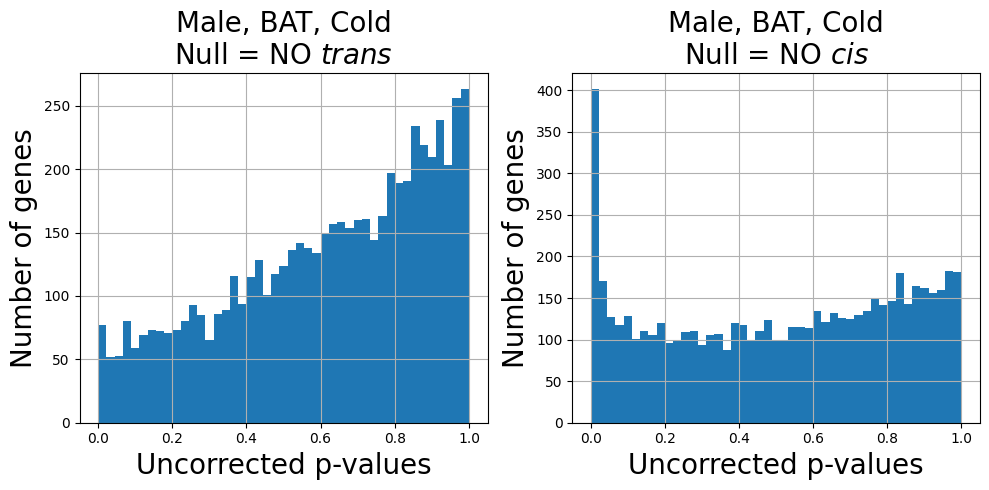

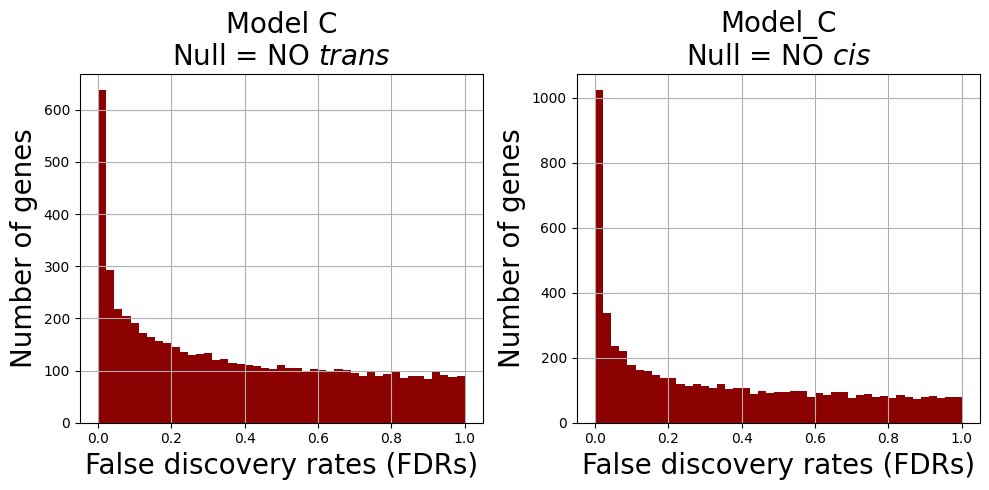

In [48]:
# histogram of pvalues and FDRs
fdr_no_cis_bat_cold, fdr_no_trans_bat_cold = get_fdrs(pvals_no_cis_bat_cold,
                                                      pvals_no_trans_bat_cold,
                                                      title=title_bat_cold,visualize = True)

In [49]:
# histogram and scatter plots of learned weights
# plot_weight_distributions(coefficients_bat_cold,
#                               title=title_bat_cold,
#                               color = 'salmon',
#                               bins=100)

In [50]:
# r2_bat_cold = get_r2(actual_values=actual_values_bat_cold,
#                      fitted_values=fitted_values_bat_cold,
#                      title=title_bat_cold,
#                      color='salmon')

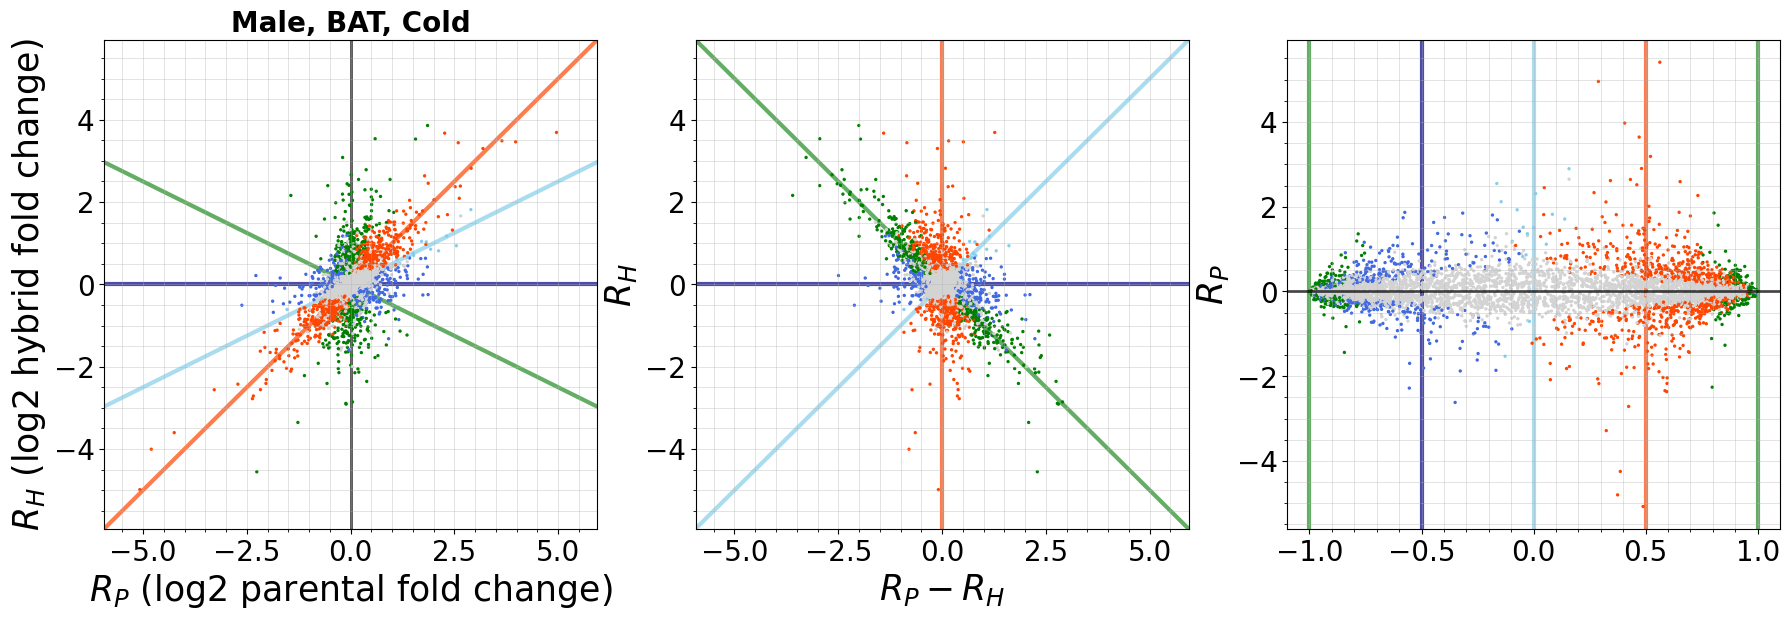

In [51]:
df_bat_cold = make_triplot_horizontal(coefficients=coefficients_bat_cold,
                 fdr_no_cis=fdr_no_cis_bat_cold,
                 fdr_no_trans=fdr_no_trans_bat_cold,
                 genes=genes_bat_cold,
                 title=title_bat_cold)

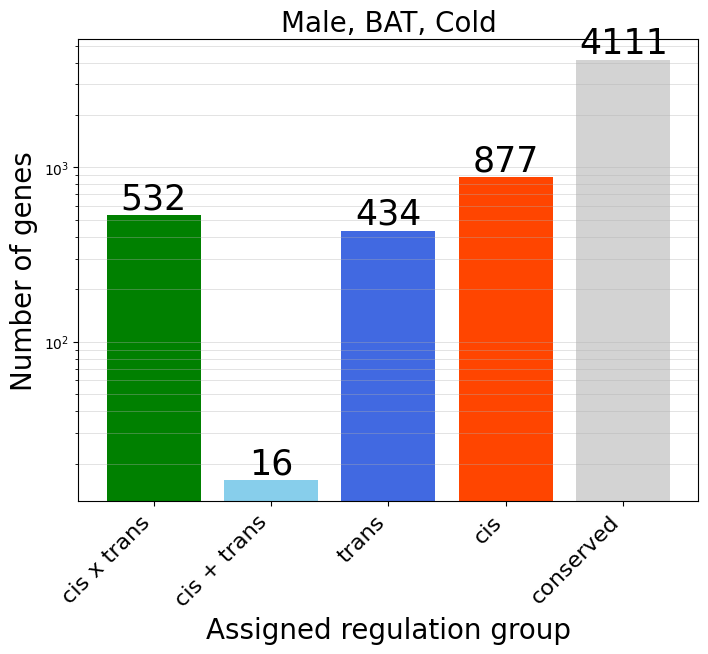

In [52]:
# number per category
plot_reg_bar(reg_assignments=df_bat_cold['reg_assignment'].values,
             title=title_bat_cold)

/tmp/ipykernel_449543/1862078399.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bat_cold['Reg_to_compare'][df_bat_cold['reg_assignment'].values=='cis'] = 'CIS_ONLY'
/tmp/ipykernel_449543/1862078399.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bat_cold['Reg_to_compare'][df_bat_cold['reg_assignment'].values=='conserved'] = 'Amb&Conserved'
/tmp/ipykernel_449543/1862078399.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

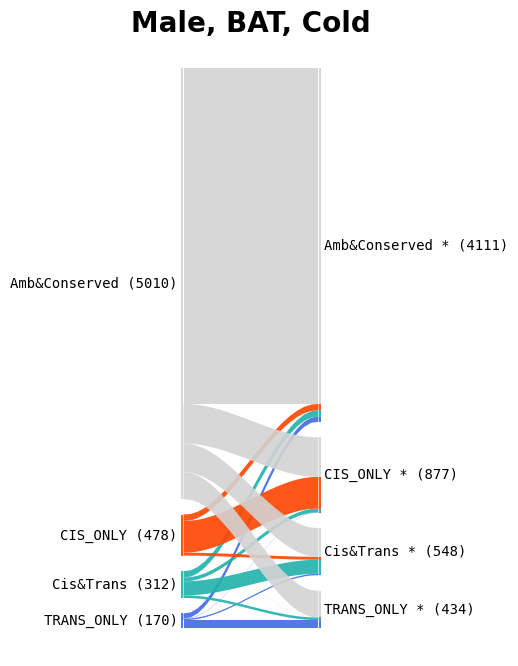

In [53]:
# alluvial plot
assigned_bat_cold['Reg_to_compare']=assigned_bat_cold['Amb&Conserved'].values
df_bat_cold['Reg_to_compare'] = df_bat_cold['reg_assignment'].values
df_bat_cold['Reg_to_compare'][df_bat_cold['reg_assignment'].values=='cis'] = 'CIS_ONLY'
df_bat_cold['Reg_to_compare'][df_bat_cold['reg_assignment'].values=='conserved'] = 'Amb&Conserved'
df_bat_cold['Reg_to_compare'][df_bat_cold['reg_assignment'].values=='cisxtrans'] = 'Cis&Trans'
df_bat_cold['Reg_to_compare'][df_bat_cold['reg_assignment'].values=='cis+trans'] = 'Cis&Trans'
df_bat_cold['Reg_to_compare'][df_bat_cold['reg_assignment'].values=='trans'] = 'TRANS_ONLY'

# filter
filt = (df_bat_cold.reg_assignment.values=='conserved')&(assigned_bat_cold.Reg_to_compare.values=='Amb&Conserved')
df_bat_cold_filtered = df_bat_cold[~filt]
assigned_bat_cold_filtered = assigned_bat_cold[~filt]

column = 'Reg_to_compare'
reg_groups = ['Cis&Trans','TRANS_ONLY', 'CIS_ONLY', 'Amb&Conserved']

plot_alluvian2(df1=assigned_bat_cold,
               df2=df_bat_cold,
               title=title_bat_cold,
              column=column,
              reg_groups=reg_groups,
              alluvial_colors = ['royalblue','lightseagreen','orangered','lightgray'],
              plot_log=False,
              );

In [134]:
a = assigned_bat_cold.Reg_to_compare.values == 'Amb&Conserved'
b = df_bat_cold.Reg_to_compare.values == 'Amb&Conserved'
len(a)-sum(a&b)-877-548-434

207

In [54]:
same = sum(assigned_bat_cold.Reg_to_compare.values==df_bat_cold.Reg_to_compare.values) / len(assigned_bat_cold.Reg_to_compare.values)
1- same, same

(0.2413735343383585, 0.7586264656616415)

# Male, BAT, Warm results

In [55]:
results_path = '../results/BATwarm_'
title_bat_warm = 'Male, BAT, Warm'

coefficients_bat_warm = pd.read_csv(f'{results_path}weights_log_additive.csv',header=0,index_col=0)
sig_df_ = pd.read_csv(f'{results_path}sig_log_additive.csv',header=0,index_col=0)


pvals_no_cis_bat_warm = sig_df_['raw_pval_beta_cis'].values
pvals_no_trans_bat_warm = sig_df_['raw_pval_beta_trans'].values


# assigned categories 
assigned_bat_warm = pd.read_csv(data_path + 'BAT.MALE.WARM.categories.forplot.txt',sep=' ')
assigned_bat_warm = assigned_bat_warm.set_index( 'Unnamed: 0' )
genes_bat_warm = np.sort(assigned_bat_warm.index.values)
assigned_bat_warm = assigned_bat_warm.loc[ genes_bat_warm, :]




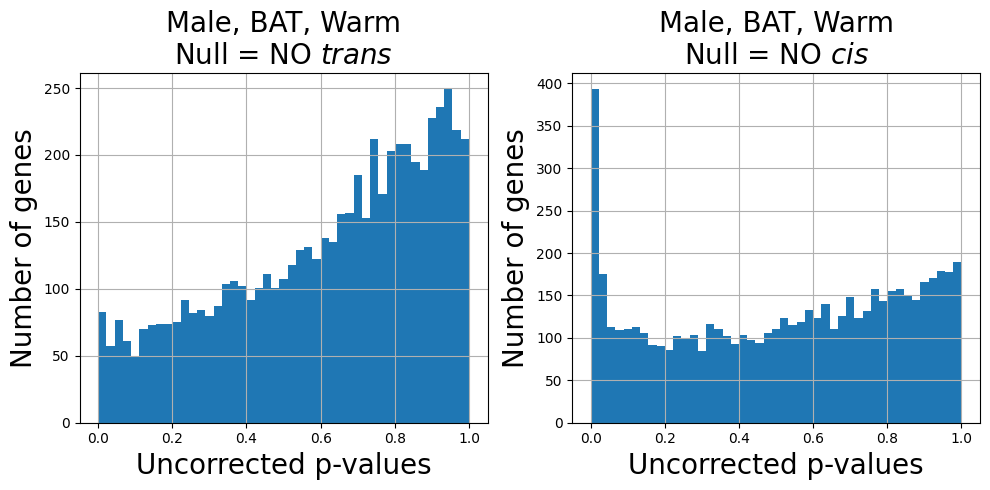

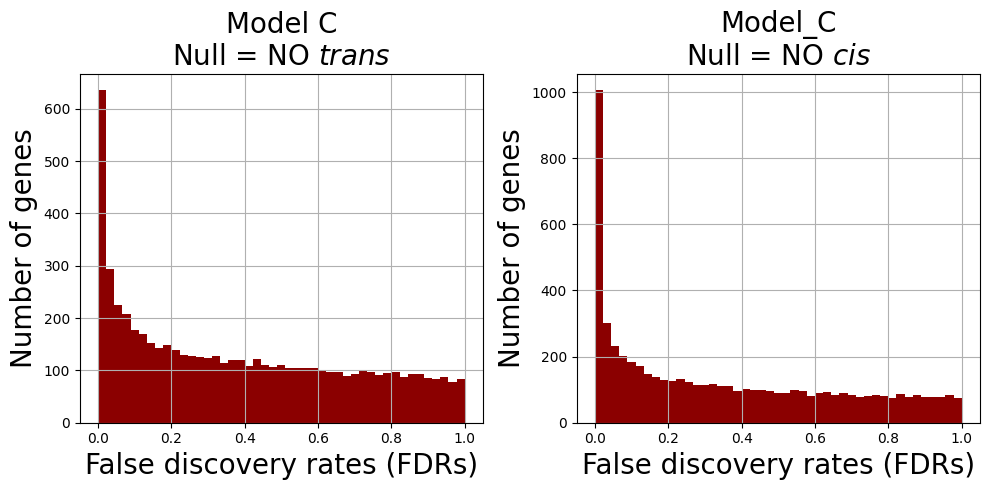

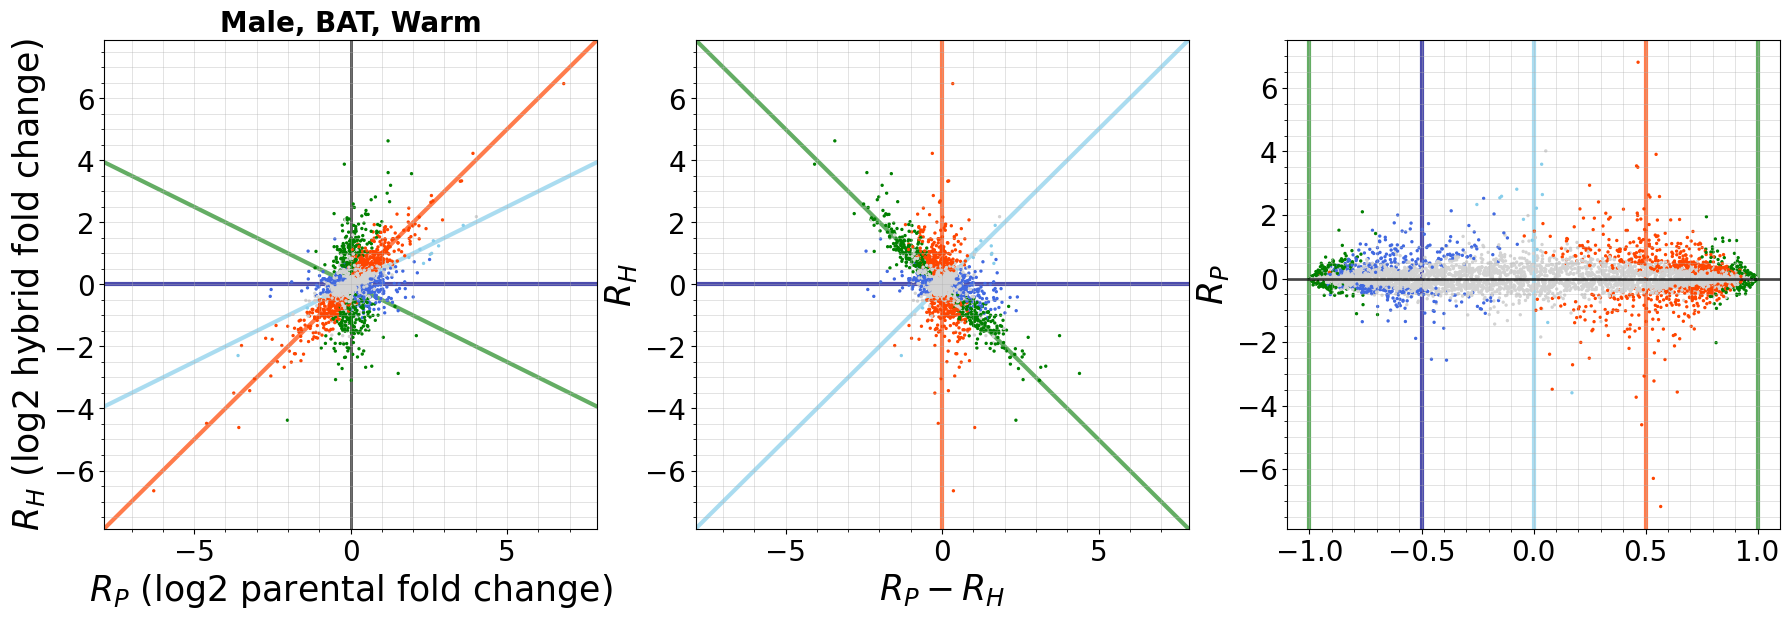

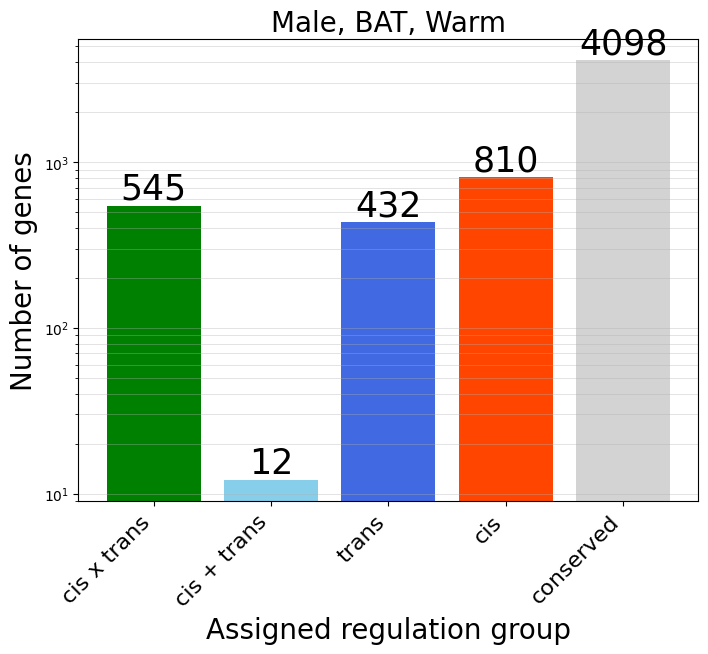

In [56]:
# histogram of pvalues and FDRs
fdr_no_cis_bat_warm, fdr_no_trans_bat_warm = get_fdrs(pvals_no_cis_bat_warm,
                                                      pvals_no_trans_bat_warm,
                                                      title=title_bat_warm,visualize = True)

# histogram and scatter plots of learned weights
# plot_weight_distributions(coefficients_bat_warm,
#                               title=title_bat_warm,
#                               color = 'tomato',
#                               bins=100)

# r2_bat_warm = get_r2(actual_values=actual_values_bat_warm,
#                      fitted_values=fitted_values_bat_warm,
#                      title=title_bat_warm,
#                      color='tomato')

df_bat_warm = make_triplot_horizontal(coefficients=coefficients_bat_warm,
                 fdr_no_cis=fdr_no_cis_bat_warm,
                 fdr_no_trans=fdr_no_trans_bat_warm,
                 genes=genes_bat_warm,
                 title=title_bat_warm)

# number per category
plot_reg_bar(reg_assignments=df_bat_warm['reg_assignment'].values,
             title=title_bat_warm)

/tmp/ipykernel_449543/1538656402.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bat_warm['Reg_to_compare'][df_bat_warm['reg_assignment'].values=='cis'] = 'CIS_ONLY'
/tmp/ipykernel_449543/1538656402.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bat_warm['Reg_to_compare'][df_bat_warm['reg_assignment'].values=='conserved'] = 'Amb&Conserved'
/tmp/ipykernel_449543/1538656402.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

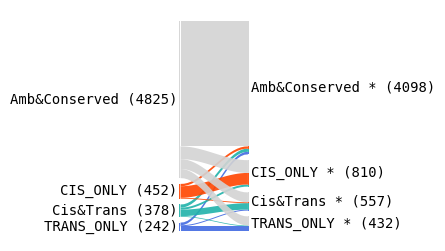

In [57]:
# alluvial plot
assigned_bat_warm['Reg_to_compare']=assigned_bat_warm['Amb&Conserved'].values
df_bat_warm['Reg_to_compare'] = df_bat_warm['reg_assignment'].values
df_bat_warm['Reg_to_compare'][df_bat_warm['reg_assignment'].values=='cis'] = 'CIS_ONLY'
df_bat_warm['Reg_to_compare'][df_bat_warm['reg_assignment'].values=='conserved'] = 'Amb&Conserved'
df_bat_warm['Reg_to_compare'][df_bat_warm['reg_assignment'].values=='cisxtrans'] = 'Cis&Trans'
df_bat_warm['Reg_to_compare'][df_bat_warm['reg_assignment'].values=='cis+trans'] = 'Cis&Trans'
df_bat_warm['Reg_to_compare'][df_bat_warm['reg_assignment'].values=='trans'] = 'TRANS_ONLY'

column = 'Reg_to_compare'
reg_groups = ['Cis&Trans','TRANS_ONLY', 'CIS_ONLY', 'Amb&Conserved']

plot_alluvian2(df1=assigned_bat_warm,df2=df_bat_warm,
               title="",
              column=column,
              reg_groups=reg_groups,
              alluvial_colors = ['royalblue','lightseagreen','orangered','lightgray'],
              plot_log=False,
              s1 = 1, 
              s2 = 3);

In [58]:
same = sum(assigned_bat_warm.Reg_to_compare.values==df_bat_warm.Reg_to_compare.values) / len(assigned_bat_warm.Reg_to_compare.values)
1- same, same

(0.23079531965406141, 0.7692046803459386)

# Male, Liver, Cold results

In [59]:
results_path = '../results/Livercold_'
title_liver_cold = 'Male, Liver, Cold'

coefficients_liver_cold = pd.read_csv(f'{results_path}weights_log_additive.csv',header=0,index_col=0)
sig_df_ = pd.read_csv(f'{results_path}sig_log_additive.csv',header=0,index_col=0)

pvals_no_cis_liver_cold = sig_df_['raw_pval_beta_cis'].values
pvals_no_trans_liver_cold = sig_df_['raw_pval_beta_trans'].values

# assigned categories 
assigned_liver_cold = pd.read_csv(data_path + 'Liver.MALE.COLD.categories.forplot.txt',sep=' ')
assigned_liver_cold = assigned_liver_cold.set_index( 'Unnamed: 0' )
genes_liver_cold = np.sort(assigned_liver_cold.index.values)
assigned_liver_cold = assigned_liver_cold.loc[ genes_liver_cold, :]

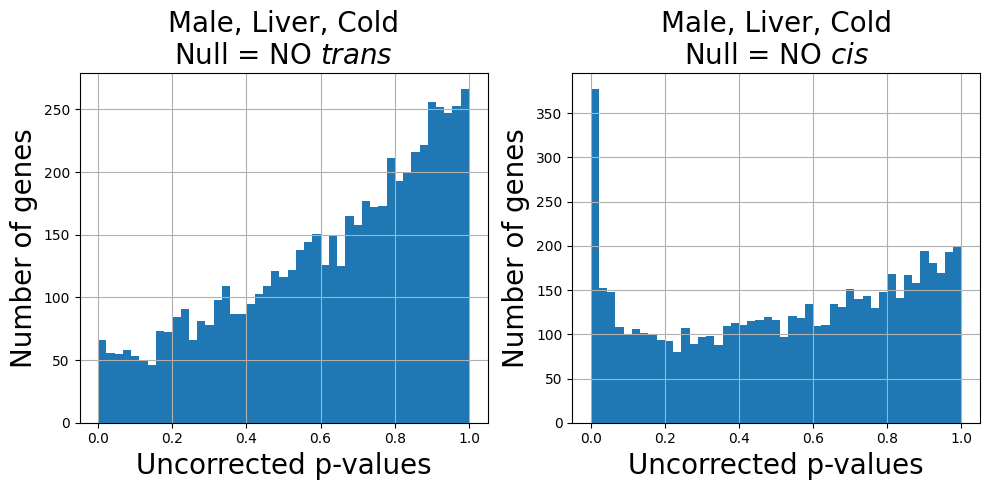

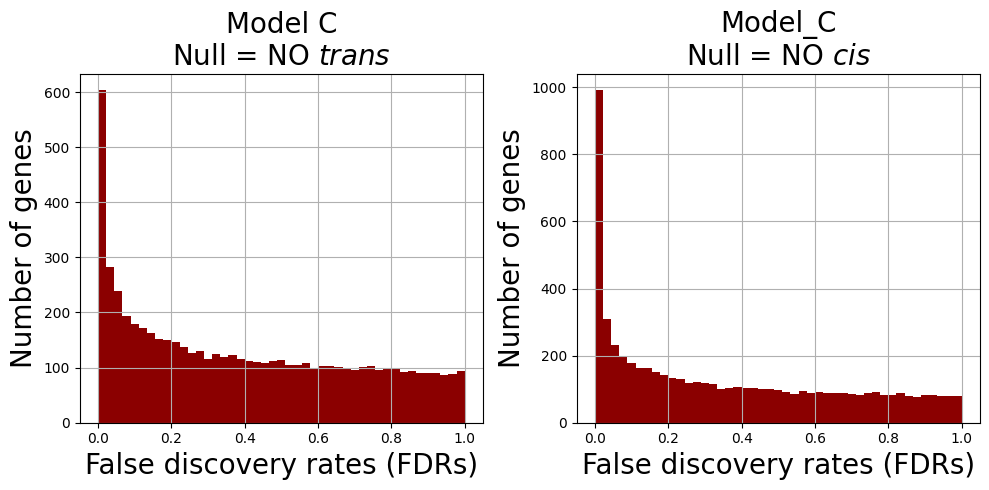

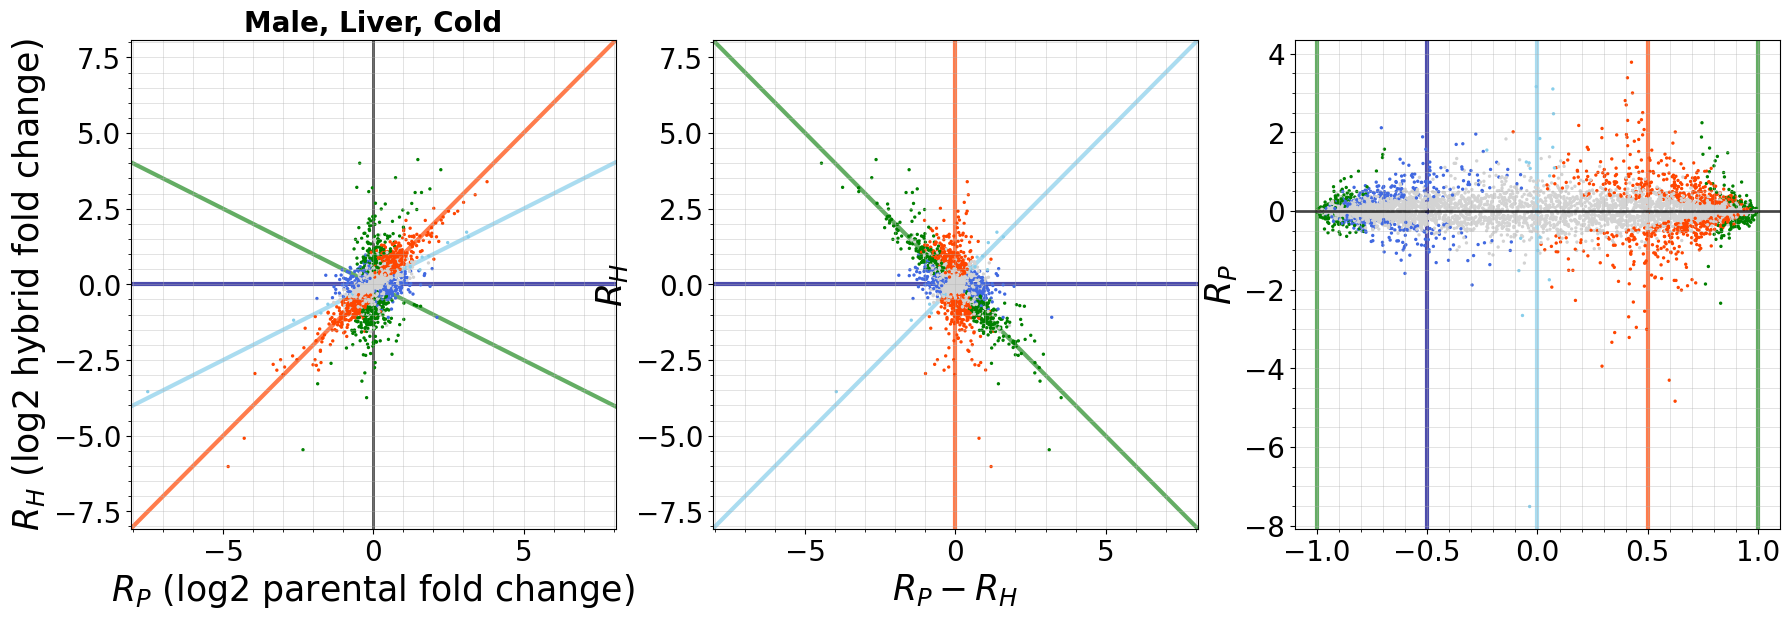

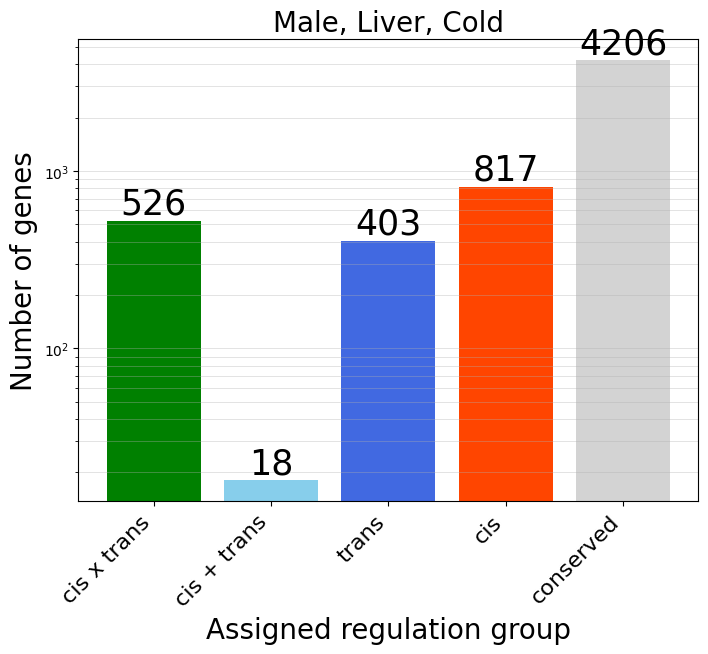

In [60]:
# histogram of pvalues and FDRs
fdr_no_cis_liver_cold, fdr_no_trans_liver_cold = get_fdrs(pvals_no_cis_liver_cold,
                                                      pvals_no_trans_liver_cold,
                                                      title=title_liver_cold,visualize = True)

# histogram and scatter plots of learned weights
# plot_weight_distributions(coefficients_liver_cold,
#                               title=title_liver_cold,
#                               color = 'paleturquoise',
#                               bins=100)

# r2_liver_cold = get_r2(actual_values=actual_values_liver_cold,
#                      fitted_values=fitted_values_liver_cold,
#                      title=title_liver_cold,
#                      color='paleturquoise')


df_liver_cold = make_triplot_horizontal(coefficients=coefficients_liver_cold,
                 fdr_no_cis=fdr_no_cis_liver_cold,
                 fdr_no_trans=fdr_no_trans_liver_cold,
                 genes=genes_liver_cold,
                 title=title_liver_cold)

plot_reg_bar(reg_assignments=df_liver_cold['reg_assignment'].values,
             title=title_liver_cold)

/tmp/ipykernel_449543/2612625338.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_liver_cold['Reg_to_compare'][df_liver_cold['reg_assignment'].values=='cis'] = 'CIS_ONLY'
/tmp/ipykernel_449543/2612625338.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_liver_cold['Reg_to_compare'][df_liver_cold['reg_assignment'].values=='conserved'] = 'Amb&Conserved'
/tmp/ipykernel_449543/2612625338.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

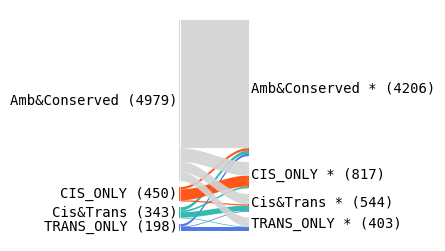

In [61]:
# alluvial plot
assigned_liver_cold['Reg_to_compare']=assigned_liver_cold['Amb&Conserved'].values
df_liver_cold['Reg_to_compare'] = df_liver_cold['reg_assignment'].values
df_liver_cold['Reg_to_compare'][df_liver_cold['reg_assignment'].values=='cis'] = 'CIS_ONLY'
df_liver_cold['Reg_to_compare'][df_liver_cold['reg_assignment'].values=='conserved'] = 'Amb&Conserved'
df_liver_cold['Reg_to_compare'][df_liver_cold['reg_assignment'].values=='cisxtrans'] = 'Cis&Trans'
df_liver_cold['Reg_to_compare'][df_liver_cold['reg_assignment'].values=='cis+trans'] = 'Cis&Trans'
df_liver_cold['Reg_to_compare'][df_liver_cold['reg_assignment'].values=='trans'] = 'TRANS_ONLY'

column = 'Reg_to_compare'
reg_groups = ['Cis&Trans','TRANS_ONLY', 'CIS_ONLY', 'Amb&Conserved']

plot_alluvian2(df1=assigned_liver_cold,df2=df_liver_cold,
              title="",
              s1=1,
              s2=3,
              column=column,
              reg_groups=reg_groups,
              alluvial_colors = ['royalblue','lightseagreen','orangered','lightgray'],
              plot_log=False);

In [62]:
same = sum(assigned_liver_cold.Reg_to_compare.values==df_liver_cold.Reg_to_compare.values) / len(assigned_liver_cold.Reg_to_compare.values)
1- same, same

(0.2360134003350084, 0.7639865996649916)

# Male, Liver, Warm results

In [63]:
results_path = '../results/Liverwarm_'
title_liver_warm = 'Male, Liver, Warm'

coefficients_liver_warm = pd.read_csv(f'{results_path}weights_log_additive.csv',header=0,index_col=0)
sig_df_ = pd.read_csv(f'{results_path}sig_log_additive.csv',header=0,index_col=0)


pvals_no_cis_liver_warm = sig_df_['raw_pval_beta_cis'].values
pvals_no_trans_liver_warm = sig_df_['raw_pval_beta_trans'].values

# assigned categories 
assigned_liver_warm = pd.read_csv(data_path + 'Liver.MALE.WARM.categories.forplot.txt',sep=' ')
assigned_liver_warm = assigned_liver_warm.set_index( 'Unnamed: 0' )
genes_liver_warm = np.sort(assigned_liver_warm.index.values)
assigned_liver_warm = assigned_liver_warm.loc[ genes_liver_warm, :]


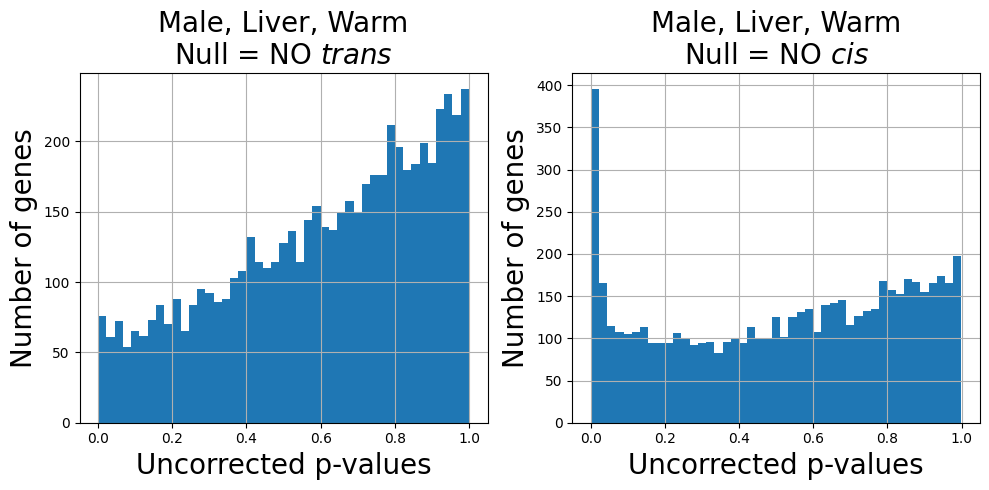

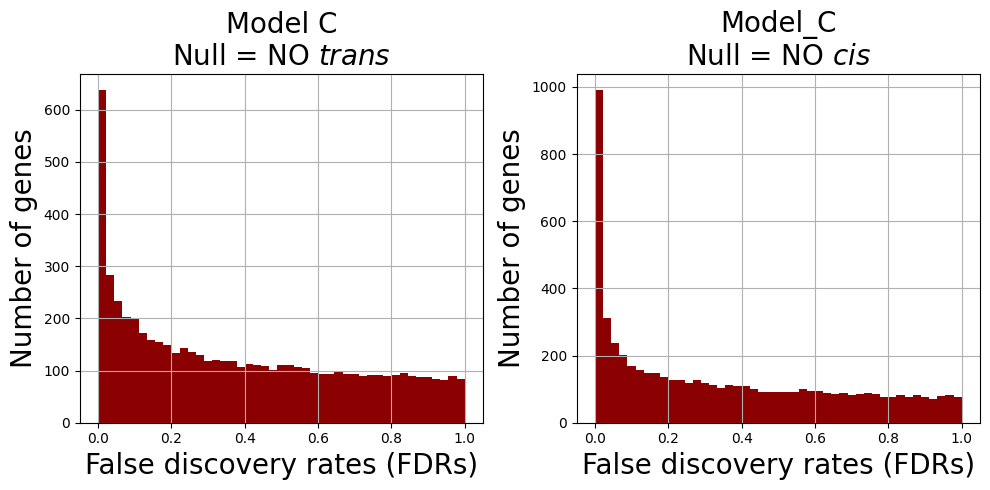

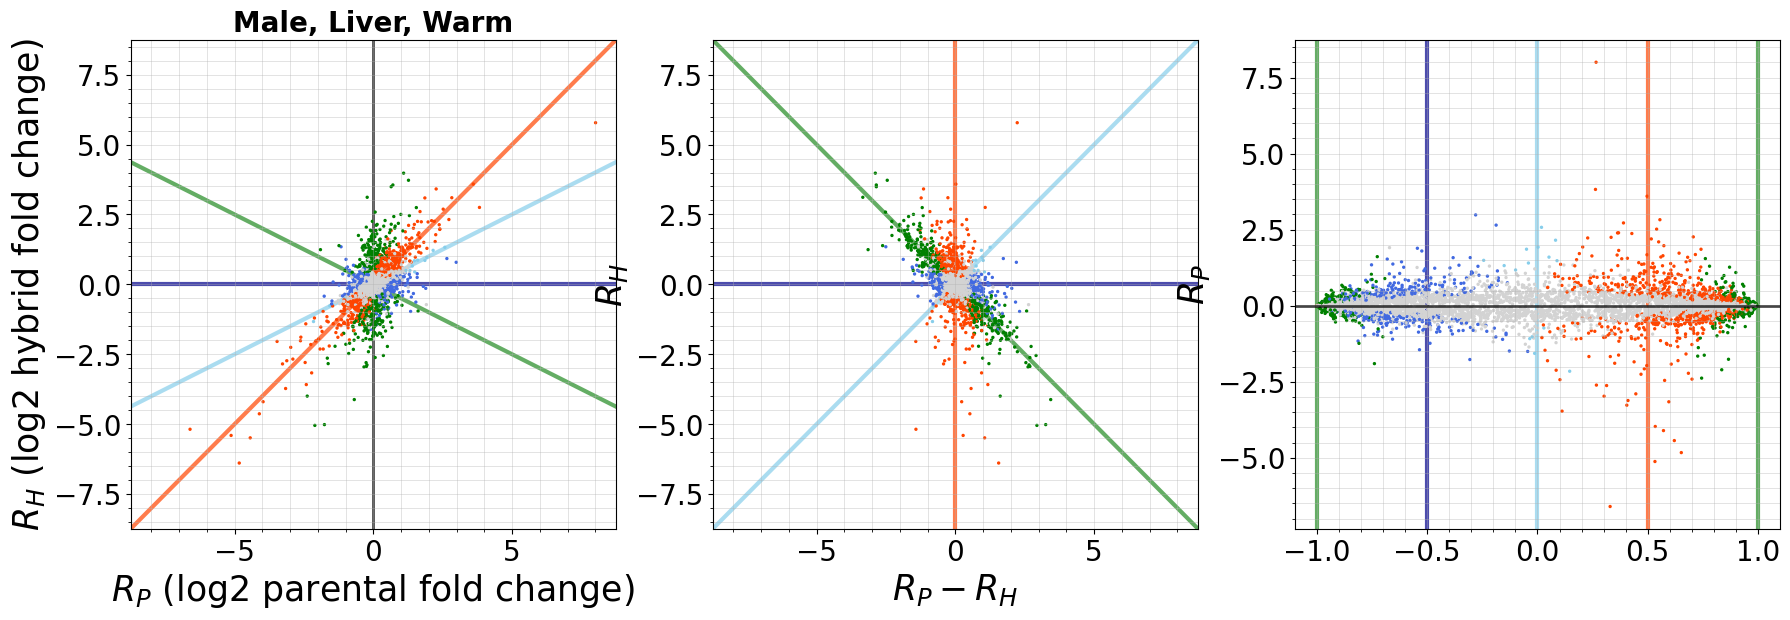

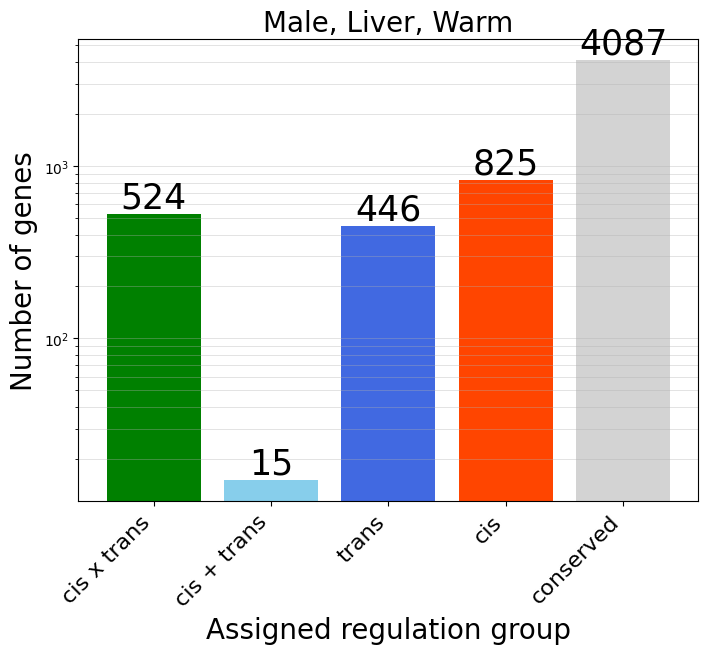

In [64]:
# histogram of pvalues and FDRs
fdr_no_cis_liver_warm, fdr_no_trans_liver_warm = get_fdrs(pvals_no_cis_liver_warm,
                                                      pvals_no_trans_liver_warm,
                                                      title=title_liver_warm,visualize = True)

# histogram and scatter plots of learned weights
# plot_weight_distributions(coefficients_liver_warm,
#                               title=title_liver_warm,
#                               color = 'darkturquoise',
#                               bins=100)

# r2_bat_warm = get_r2(actual_values=actual_values_liver_warm,
#                      fitted_values=fitted_values_liver_warm,
#                      title=title_liver_warm,
#                      color='darkturquoise')


df_liver_warm = make_triplot_horizontal(coefficients=coefficients_liver_warm,
                 fdr_no_cis=fdr_no_cis_liver_warm,
                 fdr_no_trans=fdr_no_trans_liver_warm,
                 genes=genes_liver_warm,
                 title=title_liver_warm)

# number per category
plot_reg_bar(reg_assignments=df_liver_warm['reg_assignment'].values,
             title=title_liver_warm)

/tmp/ipykernel_449543/1581722039.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_liver_warm['Reg_to_compare'][df_liver_warm['reg_assignment'].values=='cis'] = 'CIS_ONLY'
/tmp/ipykernel_449543/1581722039.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_liver_warm['Reg_to_compare'][df_liver_warm['reg_assignment'].values=='conserved'] = 'Amb&Conserved'
/tmp/ipykernel_449543/1581722039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

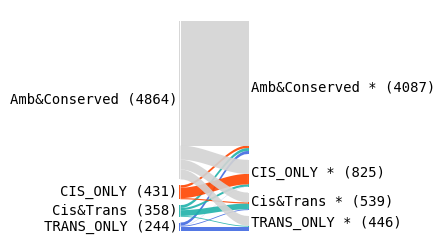

In [65]:
# alluvial plot
assigned_liver_warm['Reg_to_compare']=assigned_liver_warm['Amb&Conserved'].values
df_liver_warm['Reg_to_compare'] = df_liver_warm['reg_assignment'].values
df_liver_warm['Reg_to_compare'][df_liver_warm['reg_assignment'].values=='cis'] = 'CIS_ONLY'
df_liver_warm['Reg_to_compare'][df_liver_warm['reg_assignment'].values=='conserved'] = 'Amb&Conserved'
df_liver_warm['Reg_to_compare'][df_liver_warm['reg_assignment'].values=='cisxtrans'] = 'Cis&Trans'
df_liver_warm['Reg_to_compare'][df_liver_warm['reg_assignment'].values=='cis+trans'] = 'Cis&Trans'
df_liver_warm['Reg_to_compare'][df_liver_warm['reg_assignment'].values=='trans'] = 'TRANS_ONLY'

column = 'Reg_to_compare'
reg_groups = ['Cis&Trans','TRANS_ONLY', 'CIS_ONLY', 'Amb&Conserved']

plot_alluvian2(df1=assigned_liver_warm,df2=df_liver_warm,
               title="",
              column=column,
              reg_groups=reg_groups,
              alluvial_colors = ['royalblue','lightseagreen','orangered','lightgray'],
              plot_log=False,
              s1=1,
              s2=3);

In [66]:
same = sum(assigned_liver_warm.Reg_to_compare.values==df_liver_warm.Reg_to_compare.values) / len(assigned_liver_warm.Reg_to_compare.values)
1- same, same

(0.24605731727997282, 0.7539426827200272)

# How do the new assignments look against each other

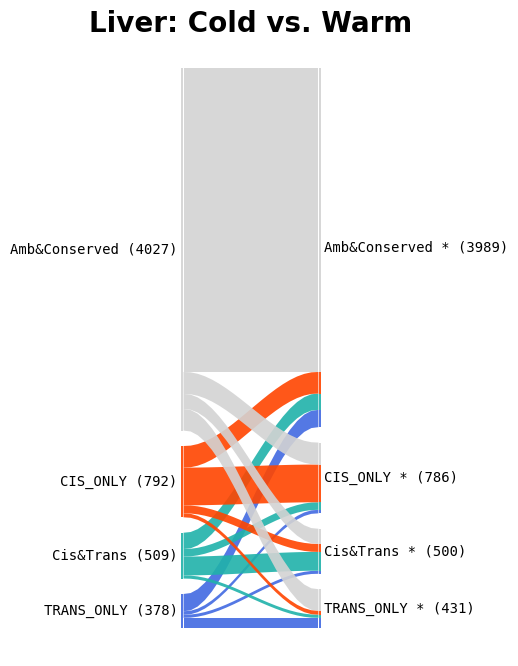

In [67]:
# Liver: cold vs warm
plot_alluvian2(df1=df_liver_cold,df2=df_liver_warm,
              title='Liver: Cold vs. Warm',
              column=column,
              reg_groups=reg_groups,
              alluvial_colors = ['royalblue','lightseagreen','orangered','lightgray'],
              plot_log=False);

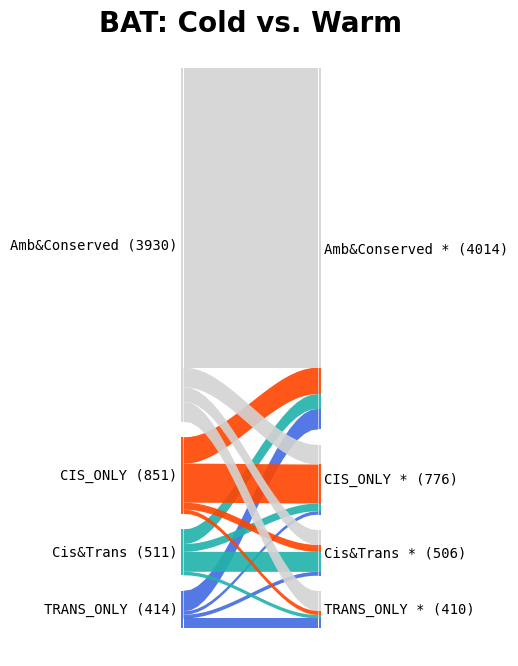

In [68]:
# BAT: cold vs warm
plot_alluvian2(df1=df_bat_cold,df2=df_bat_warm,
              title='BAT: Cold vs. Warm',
              column=column,
              reg_groups=reg_groups,
              alluvial_colors = ['royalblue','lightseagreen','orangered','lightgray'],
              plot_log=False);

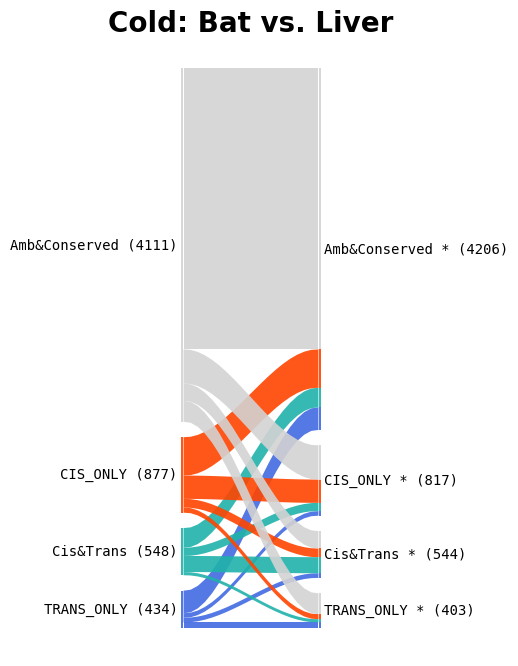

In [69]:
# COLD: bat vs. liver
plot_alluvian2(df1=df_bat_cold,df2=df_liver_cold,
              title='Cold: Bat vs. Liver',
              column=column,
              reg_groups=reg_groups,
              alluvial_colors = ['royalblue','lightseagreen','orangered','lightgray'],
              plot_log=False);

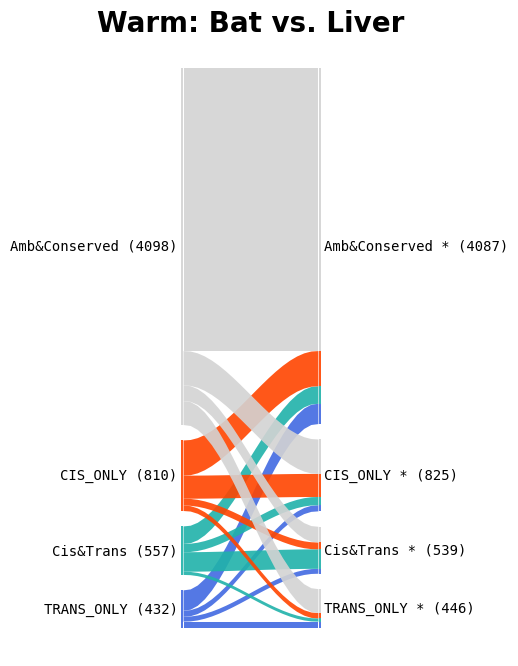

In [70]:
# Warm: bat vs. liver
plot_alluvian2(df1=df_bat_warm,df2=df_liver_warm,
              title='Warm: Bat vs. Liver',
              column=column,
              reg_groups=reg_groups,
              alluvial_colors = ['royalblue','lightseagreen','orangered','lightgray'],
              plot_log=False);

# EdgeR vs. DESeq2: Male, BAT, Cold

In [143]:
results_path = '../results/ballinger/BATcold_'
sig_df_bc = pd.read_csv(f'{results_path}sig_log_additive.csv',header=0,index_col=0)
sig_df_bc

,raw_pval_beta_cis,raw_pval_beta_trans,BH_FDR_beta_cis,BH_FDR_beta_trans,logLik,dispersions
ENSMUSG00000000056,0.437359,0.478432,0.182563,0.143850,-115.138431,0.046872
ENSMUSG00000000058,0.649279,0.896421,0.390329,0.729599,-180.749737,0.300849
ENSMUSG00000000078,0.844182,0.100520,0.681567,0.004900,-132.837742,0.141894
ENSMUSG00000000088,0.904360,0.944528,0.793777,0.846436,-212.056368,0.486751
ENSMUSG00000000120,0.582758,0.863341,0.313830,0.657701,-92.570678,0.246163
...,...,...,...,...,...,...
ENSMUSG00000116262,0.218665,0.976300,0.053622,0.929693,-74.808410,0.144864
ENSMUSG00000116564,0.688576,0.149322,0.439674,0.010980,-92.673646,0.080695
ENSMUSG00000117406,0.970328,0.219440,0.930995,0.024774,-72.175203,0.221983
ENSMUSG00000117814,0.223652,0.786156,0.055670,0.507117,-114.241635,0.204888


In [146]:
sig_df_bc = pd.read_csv(f'{results_path}sig_log_additive.csv',header=0,index_col=0)

results_dict_edgeR  = {"FULL_MODEL" : {}, "_no_cis": {}, "_no_trans" : {}} 



results_dict_edgeR["_no_cis"]["LR_pvals"] = sig_df_bc['raw_pval_beta_cis'].values
results_dict_edgeR["_no_trans"]["LR_pvals"]  = sig_df_bc['raw_pval_beta_trans'].values
results_dict_edgeR["_no_cis"]["fdr"],results_dict_edgeR["_no_trans"]["fdr"] = get_fdrs(results_dict_edgeR["_no_cis"]["LR_pvals"],results_dict_edgeR["_no_trans"]["LR_pvals"],visualize=False)
results_dict_edgeR["_no_trans"]["fdr"] 

results_dict_edgeR["FULL_MODEL"]["fitted_values"]  = pd.read_csv(f'/home/maria/igvf/PBMC/results/ballinger/BATcold_fitted_vals_log_additive.csv')
results_dict_edgeR["FULL_MODEL"]["coefficients"] = pd.read_csv(f'/home/maria/igvf/PBMC/results/ballinger/BATcold_weights_log_additive.csv')
results_dict_edgeR["FULL_MODEL"]["logLik"] = sig_df_bc['logLik'].values
results_dict_edgeR["FULL_MODEL"]["dispersions"] = sig_df_bc['dispersions'].values

In [147]:
results_dict_deseq2 = {"FULL_MODEL" : {}}

# load in FULL model results
results_path_deseq2 = f'../results/male_'
tissue = "BAT"
temp = "cold"
null_ = ""
results_dict_deseq2["FULL_MODEL"]['fitted_values'] = pd.read_csv(f'{results_path_deseq2}{tissue}_{temp}_deseq2{null_}_fitted_vals.csv')
results_dict_deseq2["FULL_MODEL"]['coefficients'] = pd.read_csv(f'{results_path_deseq2}{tissue}_{temp}_deseq2{null_}_coefficients.csv')
results_dict_deseq2["FULL_MODEL"]['logLik'] = pd.read_csv(f'{results_path_deseq2}{tissue}_{temp}_deseq2{null_}_logLik.csv')
results_dict_deseq2["FULL_MODEL"]['dispersions'] = pd.read_csv(f'{results_path_deseq2}{tissue}_{temp}_deseq2{null_}_dispersions.csv')

_no_cis 2
1
_no_trans 2
1


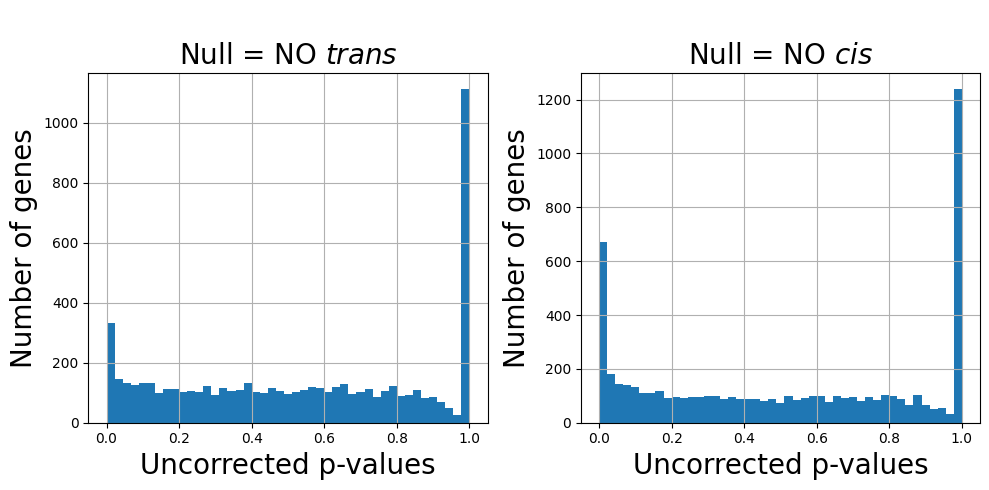

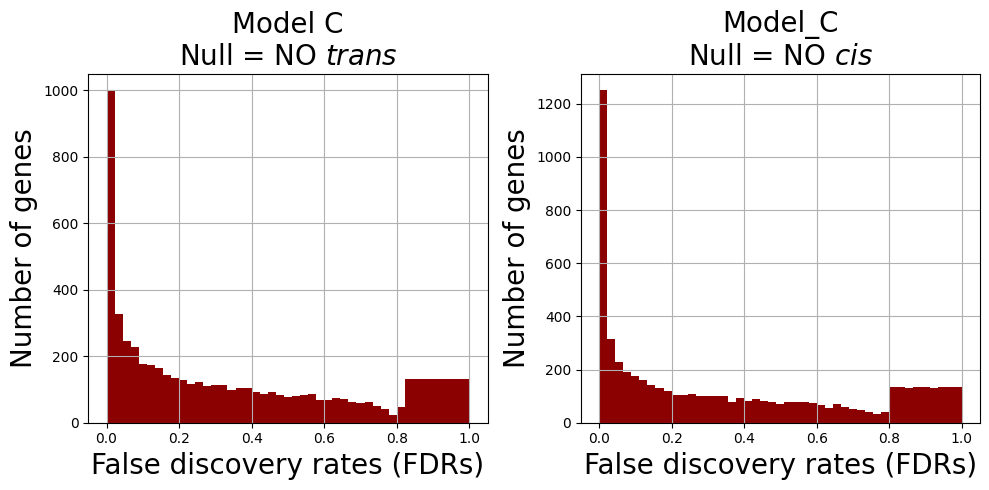

In [141]:
for null_ in ["_no_cis","_no_trans"]:
    results_dict_deseq2[null_] = {}
    results_dict_deseq2[null_]['fitted_values'] = pd.read_csv(f'{results_path_deseq2}{tissue}_{temp}_deseq2{null_}_fitted_vals.csv')
    results_dict_deseq2[null_]['coefficients'] = pd.read_csv(f'{results_path_deseq2}{tissue}_{temp}_deseq2{null_}_coefficients.csv')
    results_dict_deseq2[null_]['logLik'] = pd.read_csv(f'{results_path_deseq2}{tissue}_{temp}_deseq2{null_}_logLik.csv')
    results_dict_deseq2[null_]['LR'] =  2*(results_dict_deseq2["FULL_MODEL"]["logLik"].x.values - results_dict_deseq2[null_]["logLik"].x.values)
    n_coef_ = results_dict_deseq2[null_]['coefficients'].shape[1]
    print(null_,n_coef_)
    df_ = 3-n_coef_
    print(df_)
    results_dict_deseq2[null_]['LR_pvals'] = stats.chi2.sf(results_dict_deseq2[null_]['LR'],df_)

results_dict_deseq2['_no_cis']['fdr'],results_dict_deseq2['_no_trans']['fdr'] = get_fdrs(results_dict_deseq2['_no_cis']['LR_pvals'],results_dict_deseq2['_no_trans']['LR_pvals'])



In [117]:
# redefine some functions
def scatter_plot(x, y, 
                        point_alpha=0.3, point_edge_color='black', point_edge_width=0.5,
                        above_color='blue', below_color='red',
                        grid_color='lightgray', grid_alpha=0.8,
                        title="Scatter Plot", xlabel="X-axis", 
                        ylabel="Y-axis",
                        figsize=(8, 8),
                        logscale=False,
                        line='Identity',
                        above_line=[],
                        below_line=[]):
    fig, ax = plt.subplots(figsize=figsize)
    
    # Determine identity line limits
    min_val = min([np.min(x), np.min(y)])
    max_val = max([np.max(x), np.max(y)])
    
    # Add identity line
    if line == "Identity":
        ax.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--', label="Identity Line")
    else:
        plt.axhline(y=0)
    
    if len(above_line)==0:
        above_line = y>x
    if len(below_line)==0:
        below_line=~above_line
    # Scatter points
    ax.scatter(x[above_line], y[above_line], color=above_color, edgecolor=point_edge_color, alpha=point_alpha, linewidth=point_edge_width,
                label=f"DESeq2 $>$ EdgeR ({sum(above_line)})")
    ax.scatter(x[below_line], y[below_line], color=below_color, edgecolor=point_edge_color, alpha=point_alpha, linewidth=point_edge_width,
                label=f"DESeq2 $\leq$ EdgeR ({sum(below_line)})")
    
    # Grid and aesthetics
    ax.grid(color=grid_color, alpha=grid_alpha)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    
    # Adjust axis limits
    # ax.set_xlim(1.1*min_val, 1.1*max_val)
    # ax.set_ylim(1.1*min_val, 1.1*max_val)
    
    # Add legend
    ax.legend(fontsize=10)

    # scale 
    if logscale:
        plt.xscale('log')
        plt.yscale('log')   
    
    # Show the plot
    plt.tight_layout()
    plt.show()


def plot_reg_bar(reg_assignments,title,ylim):
    
    # number per category
    reg_groups = ['cis & trans','trans', 'cis', 'conserved']
    bar_colors = ['lightseagreen','royalblue','orangered','lightgray']
    
    num_per_reg_group = [ np.sum(reg_assignments=='cis&trans'),
                          np.sum(reg_assignments=='trans'),
                          np.sum(reg_assignments=='cis'),
                          np.sum(reg_assignments=='conserved') ]
    
    # barplot

    fig, ax = plt.subplots(1,1,figsize = (8,6) )

    axis_fs = 20
    title_fs = 20
    ax.set_ylim(0,ylim)
    bars = ax.bar(range(len(num_per_reg_group)), num_per_reg_group, color=bar_colors)

    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}',
                ha='center', va='bottom', fontsize=25)

    ax.set_xticks(range(len(num_per_reg_group)))
    ax.set_xticklabels(reg_groups,fontsize=axis_fs-4,rotation=45,ha='right')
    ax.set_xlabel('Assigned regulation group',fontsize=axis_fs)
    ax.set_ylabel('Number of genes',fontsize= axis_fs)
    # ax.set_yscale('log')
    ax.yaxis.grid(which='both', alpha=0.5, linewidth=0.5)
    ax.minorticks_on()
    ax.xaxis.set_tick_params(which='minor', bottom=False)
    ax.set_title(title,fontsize=title_fs)

    plt.show();

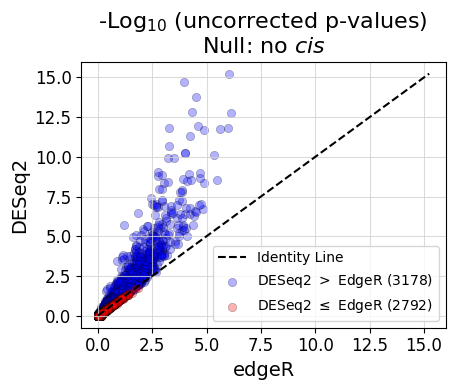

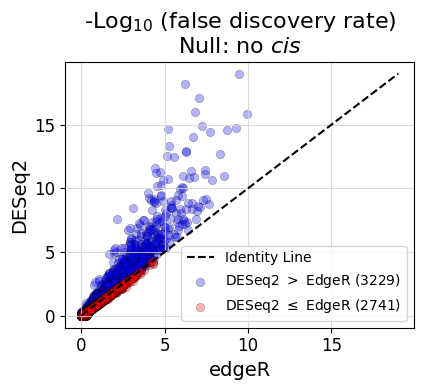

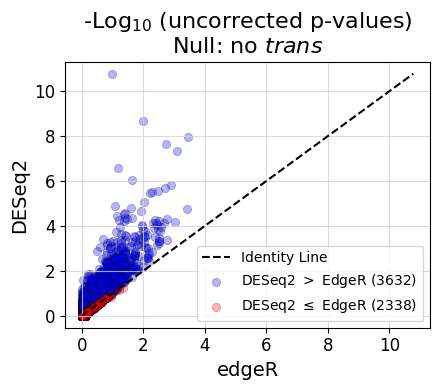

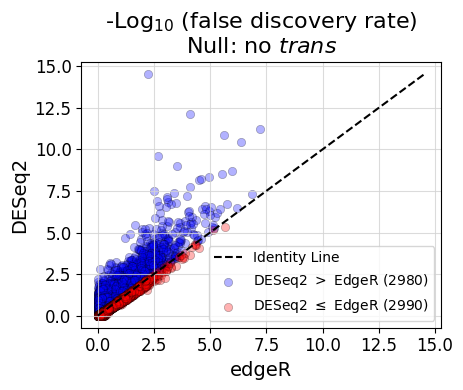

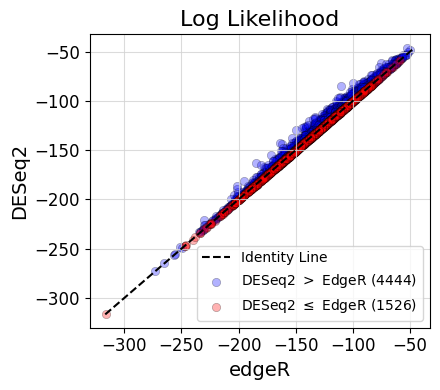

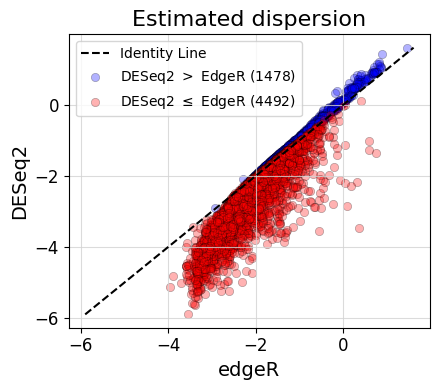

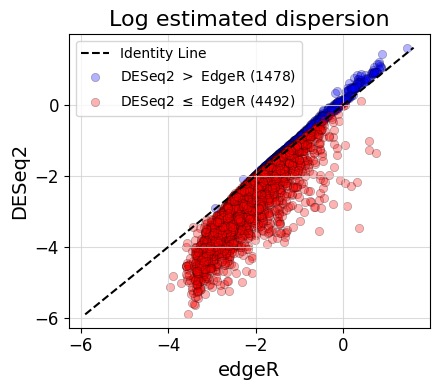

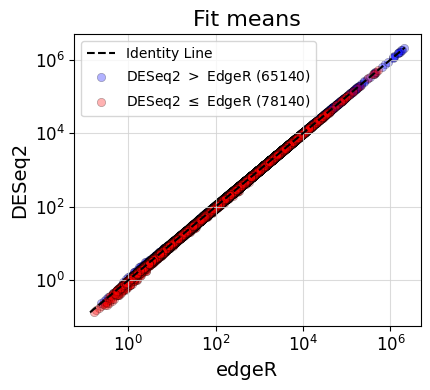

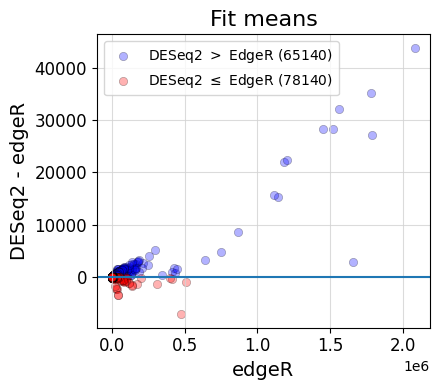

In [125]:
figsize = (4.5,4)
x,y = results_dict_edgeR["_no_cis"]["LR_pvals"],results_dict_deseq2["_no_cis"]["LR_pvals"]
x,y = -np.log10(x),-np.log10(y)
scatter_plot(x,y,
                    xlabel="edgeR",ylabel="DESeq2",
                    title="-Log$_{10}$ (uncorrected p-values) \nNull: no $cis$",
                    figsize=figsize)

x,y = results_dict_edgeR["_no_cis"]["fdr"],results_dict_deseq2["_no_cis"]["fdr"]
x,y = -np.log10(x),-np.log10(y)
scatter_plot(x,y,
                    xlabel="edgeR",ylabel="DESeq2",
                    title="-Log$_{10}$ (false discovery rate)\nNull: no $cis$",
                    figsize=figsize)


x,y = results_dict_edgeR["_no_trans"]["LR_pvals"],results_dict_deseq2["_no_trans"]["LR_pvals"]
x,y = -np.log10(x),-np.log10(y)
scatter_plot(x,y,
                    xlabel="edgeR",ylabel="DESeq2",
                    title="-Log$_{10}$ (uncorrected p-values)\nNull: no $trans$",
                    figsize=figsize)

x,y = results_dict_edgeR["_no_trans"]["fdr"],results_dict_deseq2["_no_trans"]["fdr"]
x,y = -np.log10(x),-np.log10(y)
scatter_plot(x,y,
                    xlabel="edgeR",ylabel="DESeq2",
                    title="-Log$_{10}$ (false discovery rate)\nNull: no $trans$",
                    figsize=figsize)


x,y = results_dict_edgeR["FULL_MODEL"]["logLik"],results_dict_deseq2["FULL_MODEL"]["logLik"].values.flatten()
scatter_plot(x,y,
                    xlabel="edgeR",ylabel="DESeq2",
                    title=f"Log Likelihood",
                    figsize=figsize)

x,y = results_dict_edgeR["FULL_MODEL"]["dispersions"],results_dict_deseq2["FULL_MODEL"]["dispersions"].values.flatten()
x,y = np.log(x),np.log(y)
scatter_plot(x,y,
                    xlabel="edgeR",ylabel="DESeq2",
                    title=f"Estimated dispersion",
                    figsize=figsize)

x,y = results_dict_edgeR["FULL_MODEL"]["dispersions"],results_dict_deseq2["FULL_MODEL"]["dispersions"].values.flatten()
x,y = np.log(x),np.log(y)
scatter_plot(x,y,
                    xlabel="edgeR",ylabel="DESeq2",
                    title=f"Log estimated dispersion",
                    figsize=figsize)

x,y = results_dict_edgeR["FULL_MODEL"]["fitted_values"].values.flatten(),results_dict_deseq2["FULL_MODEL"]["fitted_values"].values.flatten()

scatter_plot(x,y,
                    xlabel="edgeR",ylabel="DESeq2",
                    title=f"Fit means",
                    figsize=figsize,
                    logscale=True)

scatter_plot(x,(y-x),
                    xlabel="edgeR",ylabel="DESeq2 - edgeR",
                    title=f"Fit means",
                    figsize=figsize,
                    logscale=False,
                    line=0,
                    above_line=y>x,
                    below_line=~(y>x)
                    )

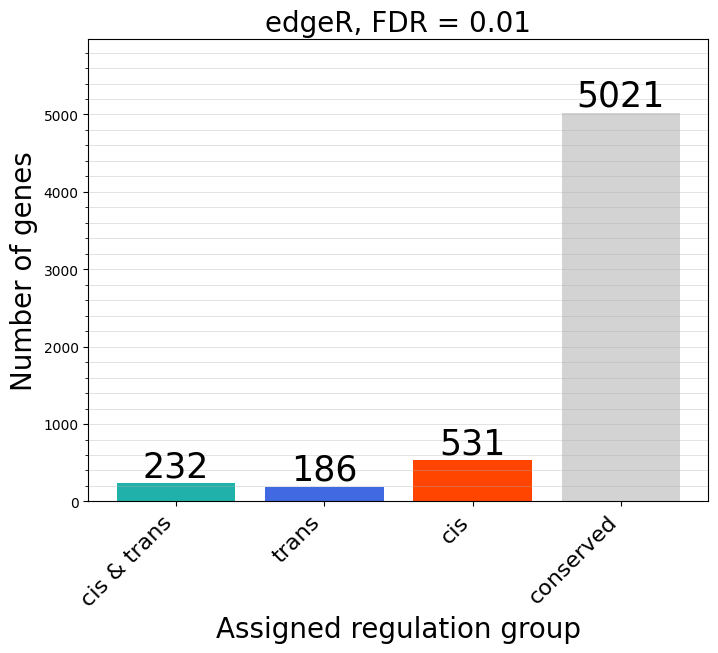

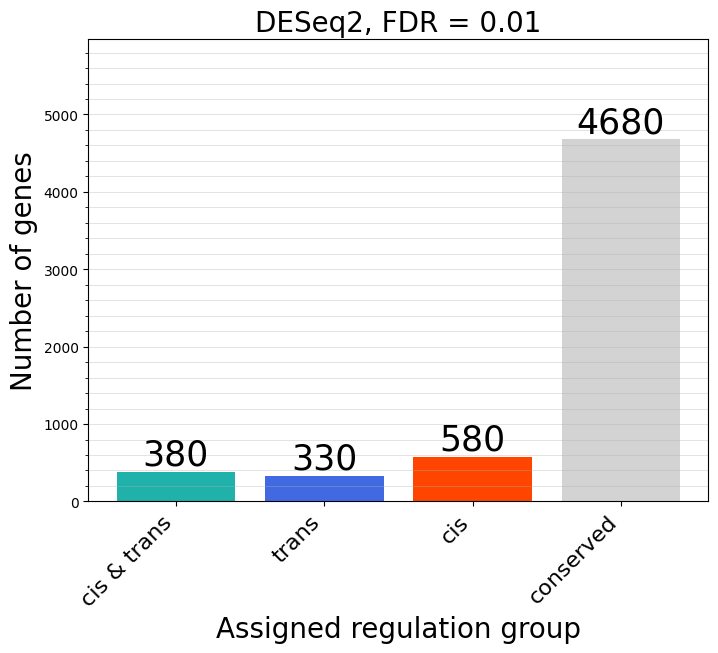

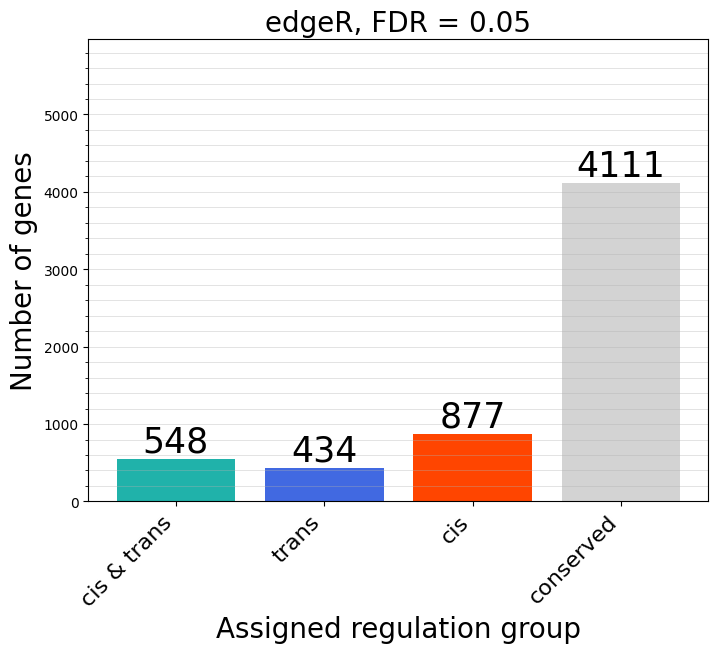

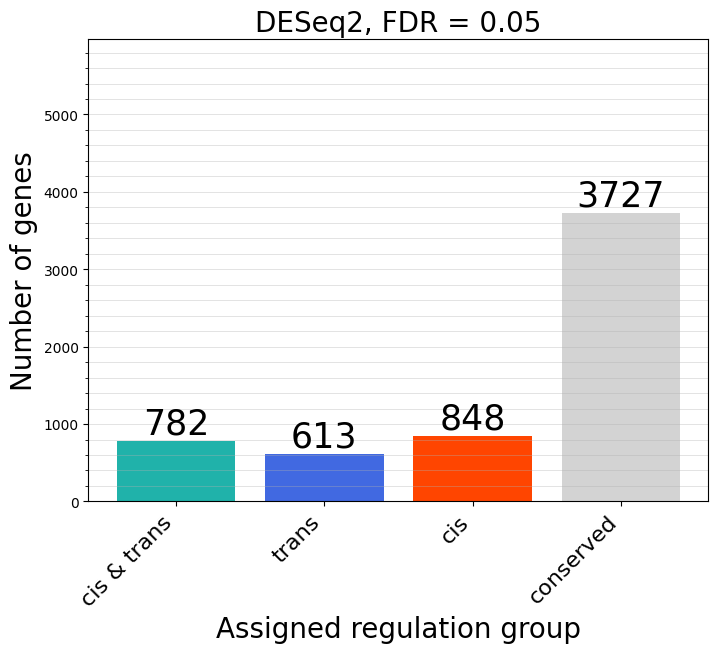

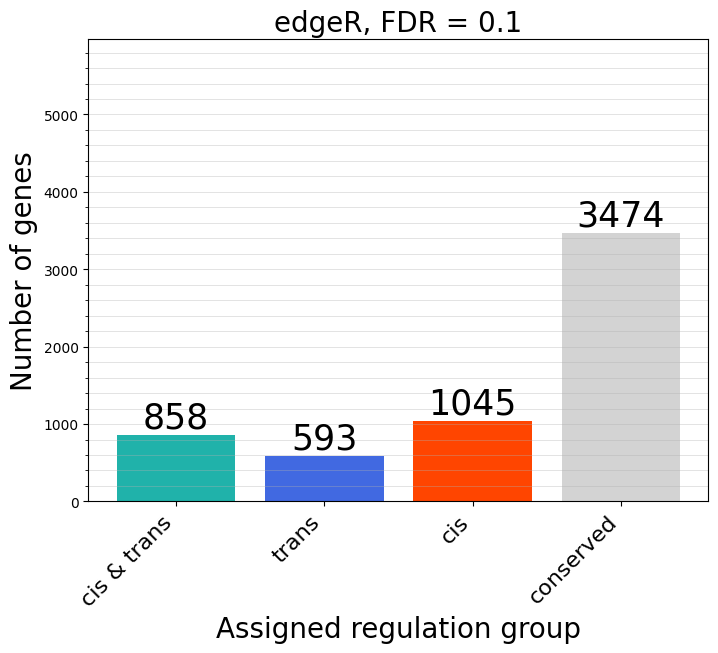

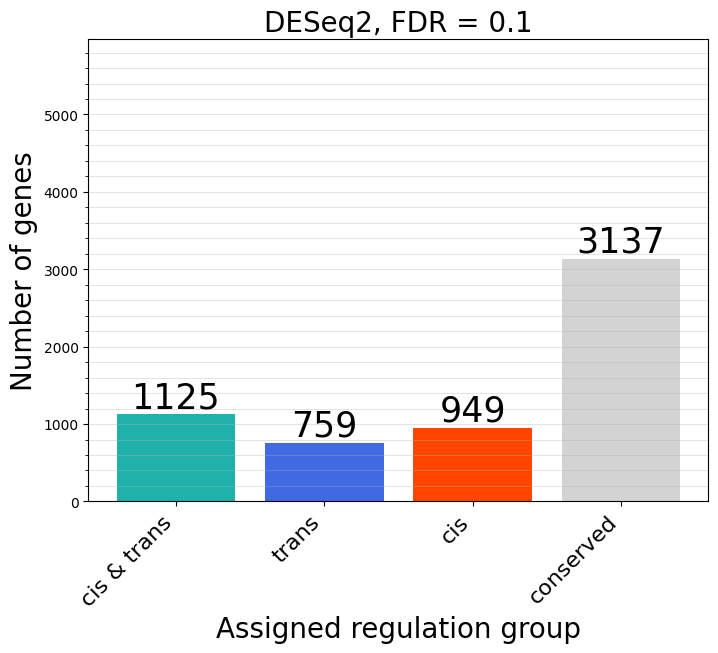

In [121]:
# how does this change the regulatory assignments
fdr_no_cis_deseq2 = results_dict_deseq2["_no_cis"]["fdr"]
fdr_no_trans_deseq2 = results_dict_deseq2["_no_trans"]["fdr"]
fdr_no_cis_edgeR = results_dict_edgeR["_no_cis"]["fdr"]
fdr_no_trans_edgeR = results_dict_edgeR["_no_trans"]["fdr"]


p_thresh = [0.01,0.05,0.1]

for p_ in p_thresh:
    fdr_no_cis = fdr_no_cis_edgeR
    fdr_no_trans = fdr_no_trans_edgeR
    # edgeR 
    cis_index = (fdr_no_cis <= p_) & (fdr_no_trans > p_)
    trans_index = (fdr_no_cis > p_) & (fdr_no_trans <= p_)
    amb_index = (fdr_no_cis > p_) & (fdr_no_trans > p_)
    cistrans_index = (fdr_no_cis <= p_) & (fdr_no_trans <= p_) 


    reg_assignments = np.array(['conserved']*len(fdr_no_cis_deseq2))

    reg_assignments[   cis_index   ] = 'cis'
    reg_assignments[   trans_index   ] = 'trans'
    reg_assignments[   cistrans_index   ] = 'cis&trans'


    plot_reg_bar(reg_assignments=reg_assignments,
                 title=f'edgeR, FDR = {p_}',
                 ylim=len(reg_assignments))

    fdr_no_cis = fdr_no_cis_deseq2
    fdr_no_trans = fdr_no_trans_deseq2

    # DESeq2
    cis_index = (fdr_no_cis <= p_) & (fdr_no_trans > p_)
    trans_index = (fdr_no_cis > p_) & (fdr_no_trans <= p_)
    amb_index = (fdr_no_cis > p_) & (fdr_no_trans > p_)
    cistrans_index = (fdr_no_cis <= p_) & (fdr_no_trans <= p_) 


    reg_assignments = np.array(['conserved']*len(fdr_no_cis_deseq2))

    reg_assignments[   cis_index   ] = 'cis'
    reg_assignments[   trans_index   ] = 'trans'
    reg_assignments[   cistrans_index   ] = 'cis&trans'


    plot_reg_bar(reg_assignments=reg_assignments,
                 title=f'DESeq2, FDR = {p_}',
                 ylim = len(reg_assignments))

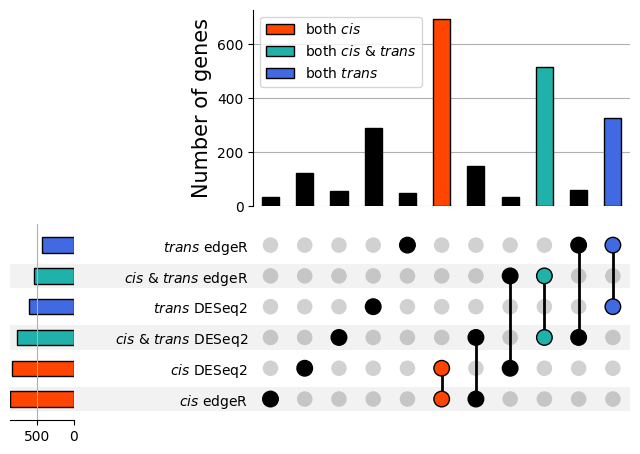

In [124]:
# upset plot for 5,000 genes
p_edgeR = 0.05
p_deseq2 = 0.05

cis_index_edgeR = (fdr_no_cis_edgeR <= p_edgeR ) & (fdr_no_trans_edgeR > p_edgeR )
trans_index_edgeR = (fdr_no_cis_edgeR > p_edgeR ) & (fdr_no_trans_edgeR <= p_edgeR )
amb_index_edgeR = (fdr_no_cis_edgeR > p_edgeR ) & (fdr_no_trans_edgeR > p_edgeR )
cistrans_index_edgeR = (fdr_no_cis_edgeR <= p_edgeR ) & (fdr_no_trans_edgeR <= p_edgeR ) 

cis_index_deseq2 = (fdr_no_cis_deseq2 <= p_deseq2 ) & (fdr_no_trans_deseq2 > p_deseq2 )
trans_index_deseq2 = (fdr_no_cis_deseq2 > p_deseq2 ) & (fdr_no_trans_deseq2 <= p_deseq2 )
amb_index_deseq2 = (fdr_no_cis_deseq2 > p_deseq2 ) & (fdr_no_trans_deseq2 > p_deseq2 )
cistrans_index_deseq2 = (fdr_no_cis_deseq2 <= p_deseq2 ) & (fdr_no_trans_deseq2 <= p_deseq2 ) 


gene_numbers = np.arange(len(cis_index_deseq2))
upset_dict = {'$cis$ DESeq2' : gene_numbers[cis_index_deseq2],
              '$trans$ DESeq2' : gene_numbers[trans_index_deseq2],
              '$cis$ & $trans$ DESeq2' : gene_numbers[cistrans_index_deseq2],
              '$cis$ edgeR' : gene_numbers[cis_index_edgeR],
              '$trans$ edgeR' : gene_numbers[trans_index_edgeR],
              '$cis$ & $trans$ edgeR' : gene_numbers[cistrans_index_edgeR],
              }


upset_df = upsetplot.from_contents(upset_dict)

# ['lightseagreen','royalblue','orangered','lightgray']
upset = upsetplot.UpSet(upset_df)
upset.style_categories(
    ["$cis$ DESeq2","$cis$ edgeR"], bar_facecolor="orangered",bar_edgecolor="black"
)
upset.style_categories(
    ["$trans$ DESeq2","$trans$ edgeR"], bar_facecolor="royalblue",bar_edgecolor="black"
)
upset.style_categories(
    ["$cis$ & $trans$ DESeq2","$cis$ & $trans$ edgeR"], bar_facecolor="lightseagreen",bar_edgecolor="black"
)
upset.style_subsets(present=["$cis$ edgeR", "$cis$ DESeq2"], facecolor="orangered",edgecolor="black",label="both $cis$")
upset.style_subsets(present=["$cis$ & $trans$ edgeR", "$cis$ & $trans$ DESeq2"], facecolor="lightseagreen",edgecolor="black",label="both $cis$ & $trans$")
upset.style_subsets(present=["$trans$ edgeR", "$trans$ DESeq2"], facecolor="royalblue",edgecolor="black",label="both $trans$")

upset.plot()
plt.ylabel("Number of genes",fontsize=15);